In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Matplotlib is building the font cache; this may take a moment.


To compare positions of phosphosites across different tissues, the differences in protein length need to be taken into account. These were reetrieved from UniProtKB, except for 8 sites on 3 proteins, for which the UniProtKB entry was not found.

In [2]:
data_site = pd.read_csv("site_data", sep="\t")
Uniprot = pd.read_csv("UniprotKB_GO_human_mannually annotated.tab", sep="\t")
Uniprot.rename({"Entry": "ACC_ID"}, axis=1, inplace=True)
Uniprot.head()

,ACC_ID,Entry name,Protein names,Gene names,Length,Gene ontology (biological process),Gene ontology (cellular component),Gene ontology (GO),Gene ontology (molecular function),Gene ontology IDs,Organism,Status
0,Q00266,METK1_HUMAN,S-adenosylmethionine synthase isoform type-1 (...,MAT1A AMS1 MATA1,395,methionine catabolic process [GO:0009087]; met...,cytosol [GO:0005829],cytosol [GO:0005829]; ATP binding [GO:0005524]...,ATP binding [GO:0005524]; identical protein bi...,GO:0000096; GO:0001887; GO:0004478; GO:0005524...,Homo sapiens (Human),reviewed
1,Q8NB16,MLKL_HUMAN,Mixed lineage kinase domain-like protein (hMLKL),MLKL,471,activation of JUN kinase activity [GO:0007257]...,cell junction [GO:0030054]; cytoplasm [GO:0005...,cell junction [GO:0030054]; cytoplasm [GO:0005...,ATP binding [GO:0005524]; identical protein bi...,GO:0004672; GO:0004706; GO:0005524; GO:0005634...,Homo sapiens (Human),reviewed
2,O94851,MICA2_HUMAN,[F-actin]-monooxygenase MICAL2 (EC 1.14.13.225...,MICAL2 KIAA0750 MICAL2PV1 MICAL2PV2,1124,actin filament depolymerization [GO:0030042]; ...,nucleus [GO:0005634],nucleus [GO:0005634]; actin binding [GO:000377...,actin binding [GO:0003779]; FAD binding [GO:00...,GO:0001947; GO:0003779; GO:0005634; GO:0007010...,Homo sapiens (Human),reviewed
3,Q8TDZ2,MICA1_HUMAN,[F-actin]-monooxygenase MICAL1 (EC 1.14.13.225...,MICAL1 MICAL NICAL,1067,actin filament bundle assembly [GO:0051017]; a...,actin cytoskeleton [GO:0015629]; cytoplasm [GO...,actin cytoskeleton [GO:0015629]; cytoplasm [GO...,actin binding [GO:0003779]; actin filament bin...,GO:0001933; GO:0003779; GO:0005737; GO:0005829...,Homo sapiens (Human),reviewed
4,Q9NPJ6,MED4_HUMAN,Mediator of RNA polymerase II transcription su...,MED4 ARC36 DRIP36 VDRIP HSPC126,270,"positive regulation of transcription, DNA-temp...",core mediator complex [GO:0070847]; mediator c...,core mediator complex [GO:0070847]; mediator c...,nuclear receptor coactivator activity [GO:0030...,GO:0003712; GO:0003713; GO:0005634; GO:0005654...,Homo sapiens (Human),reviewed


In [3]:
data_site_length = pd.merge(data_site, Uniprot[["ACC_ID", "Length"]], how="left", on=["ACC_ID"], indicator=True)
print(data_site.shape[0])
print(data_site_length.shape[0])

23903
23903


In [4]:
data_site_length[data_site_length["_merge"]=="left_only"]

,ACC_ID,UP_POS,tissue,modres,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,...,T-cells,Testis,Tooth,Umbilical cord,Ureter,Urinary bladder,Urine,Total,Length,_merge
3470,P04745,391,"Nasal polyps, Palatine tonsils, Parotid gland,...",T,0,0,0,0,0,0,...,0,0,0,0,0,0,1,4,NaN,left_only
13398,Q5SRD0,20,Colon,S,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,NaN,left_only
13399,Q5SRD0,21,Colon,S,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,NaN,left_only
13400,Q5SRD0,42,Lung,S,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,NaN,left_only
13401,Q5SRD0,111,Testis,S,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,NaN,left_only
13402,Q5SRD0,146,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",S,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,NaN,left_only
13403,Q5SRD0,147,"Colon,Colon,Colon,Colon,Colon,Colon,Colon",S,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,NaN,left_only
19718,Q9BZD3,184,Lung,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,NaN,left_only


In [5]:
data_site_length = pd.merge(data_site, Uniprot[["ACC_ID", "Length"]], how="inner", on=["ACC_ID"])
print(data_site.shape[0])
print(data_site_length.shape[0]) #8 sites were on proteins (3) for which the entry has become obsolete?

23903
23895


In [6]:
def rescale_len(row):
    maxval=row['Length']
    minval=1
    pos=row['UP_POS']
    scaled_pos=(pos-minval)/(maxval-minval)*100
    row['scaled_pos']=scaled_pos
    return row
data_site_length_scaled=data_site_length.apply(rescale_len,axis=1)

In [7]:
data_site_length_scaled

,ACC_ID,UP_POS,tissue,modres,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,...,T-cells,Testis,Tooth,Umbilical cord,Ureter,Urinary bladder,Urine,Total,Length,scaled_pos
0,A0A075B6H7,30,Lung,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,116,25.217391
1,A0A075B6S5,52,Menstrual fluid,S,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,117,43.965517
2,A0A087WXM9,223,Testis,S,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,373,59.677419
3,A0A0B4J2D5,124,PBMC,S,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,268,46.067416
4,A0A0B4J2D5,145,PBMC,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,268,53.932584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23890,Q9Y6Y0,326,"Lymph node,Lymph node",S,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,642,50.702028
23891,Q9Y6Y0,336,Colon,S,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,642,52.262090
23892,Q9Y6Y0,338,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",S,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,642,52.574103
23893,Q9Y6Y8,737,Colon,S,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1000,73.673674


611


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'normalized sequence position')

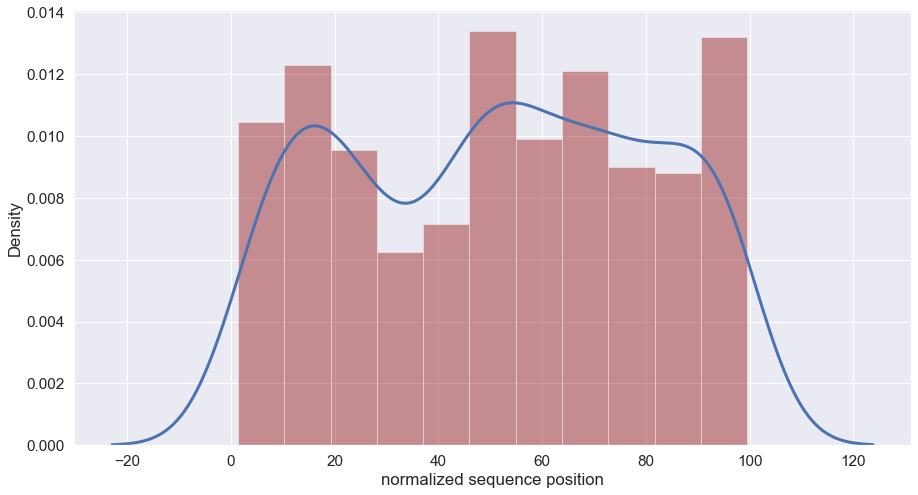

In [8]:
sns.set(font_scale=1.4)
print(data_site_length_scaled[data_site_length_scaled["Adipose tissue"]==1].shape[0])
plt.figure(figsize=(15,8))      

sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Adipose tissue"]==1, "scaled_pos"], kde=True,bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'b'})

plt.xlabel("normalized sequence position")

361


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'normalized sequence position')

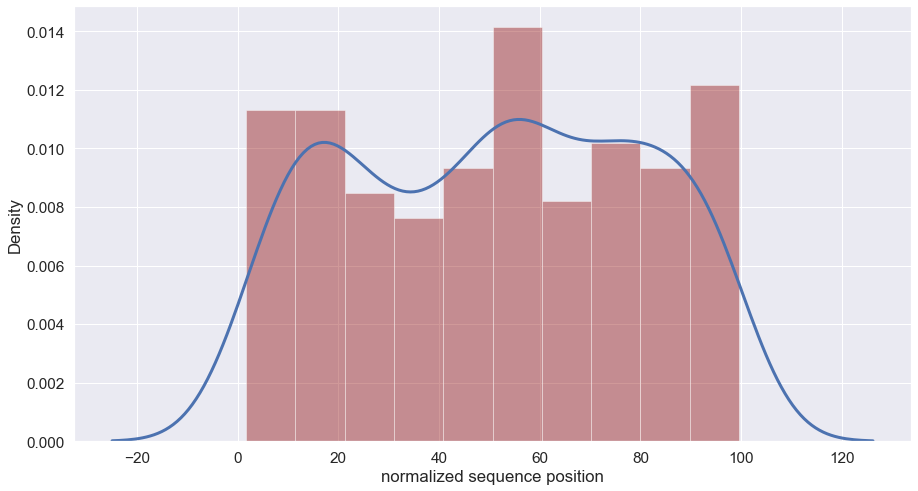

In [9]:
sns.set(font_scale=1.4)
print(data_site_length_scaled[data_site_length_scaled["B-cells"]==1].shape[0])
plt.figure(figsize=(15,8))      

sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["B-cells"]==1, "scaled_pos"], kde=True,bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'b'})

plt.xlabel("normalized sequence position")

7069


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'normalized sequence position')

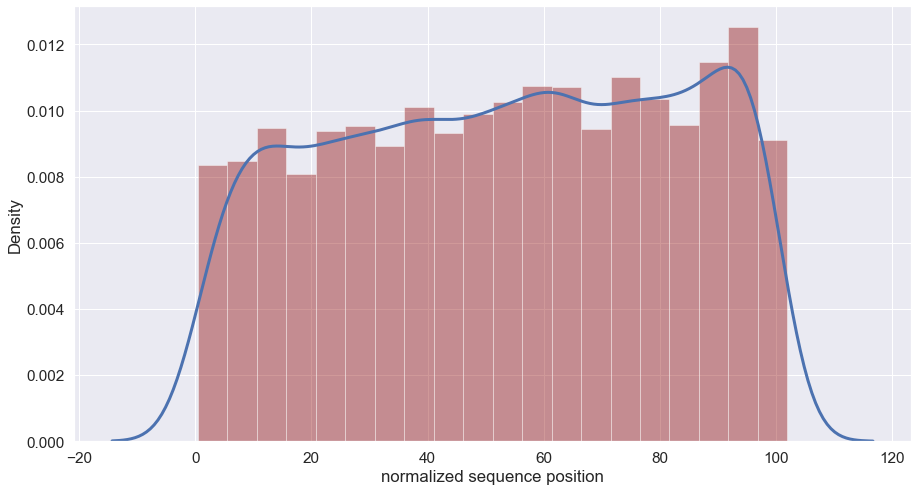

In [10]:
sns.set(font_scale=1.4)
print(data_site_length_scaled[data_site_length_scaled["Blood"]==1].shape[0])
plt.figure(figsize=(15,8))      

sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Blood"]==1, "scaled_pos"], kde=True,bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'b'})

plt.xlabel("normalized sequence position")

13


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'normalized sequence position')

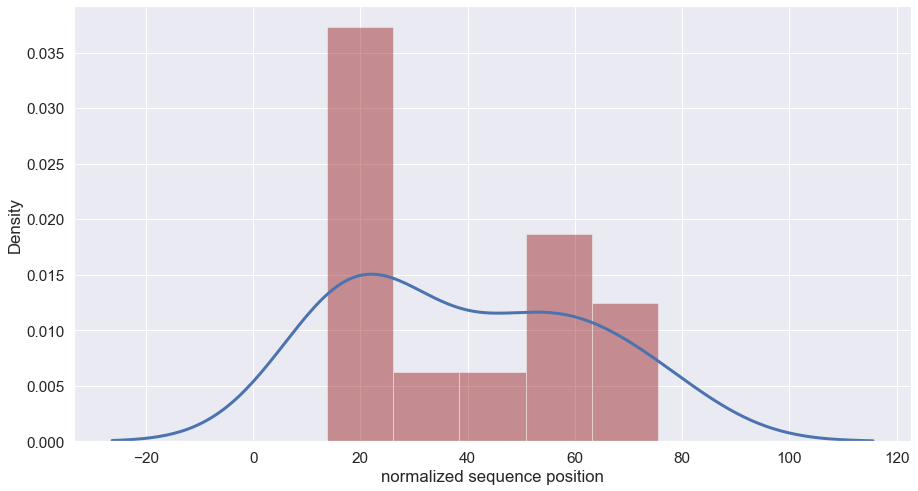

In [11]:
sns.set(font_scale=1.4)
print(data_site_length_scaled[data_site_length_scaled["Bone"]==1].shape[0])
plt.figure(figsize=(15,8))      

sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Bone"]==1, "scaled_pos"], kde=True,bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'b'})

plt.xlabel("normalized sequence position")

2604


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'normalized sequence position')

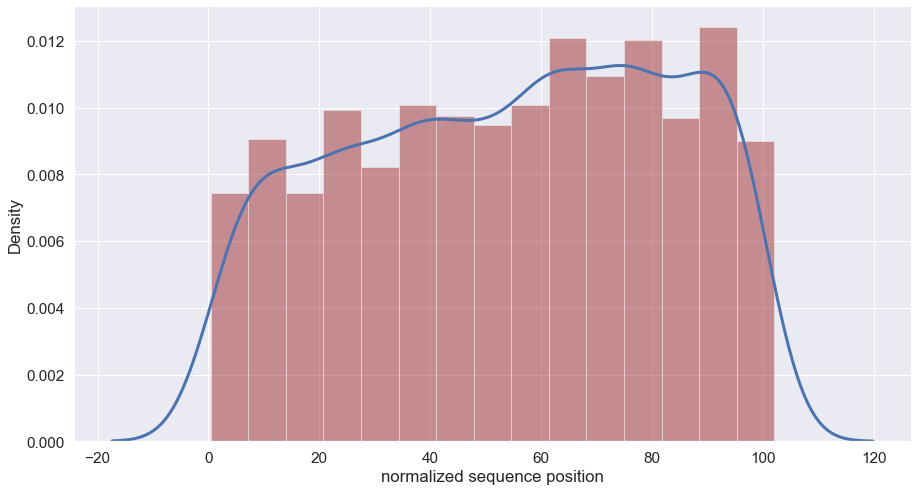

In [12]:
sns.set(font_scale=1.4)
print(data_site_length_scaled[data_site_length_scaled["Brain"]==1].shape[0])
plt.figure(figsize=(15,8))      

sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Brain"]==1, "scaled_pos"], kde=True,bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'b'})

plt.xlabel("normalized sequence position")

157


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'normalized sequence position')

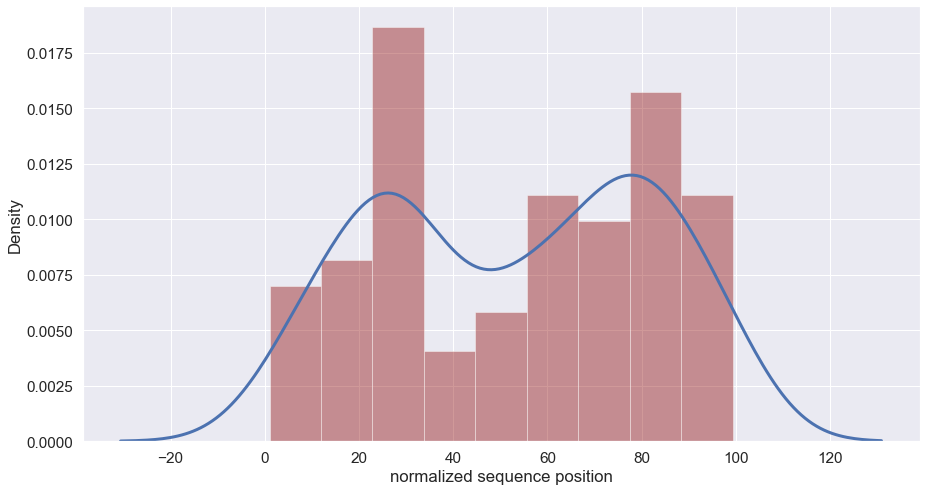

In [13]:
sns.set(font_scale=1.4)
print(data_site_length_scaled[data_site_length_scaled["Breast"]==1].shape[0])
plt.figure(figsize=(15,8))      

sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Breast"]==1, "scaled_pos"], kde=True,bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'b'})

plt.xlabel("normalized sequence position")

2242


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'normalized sequence position')

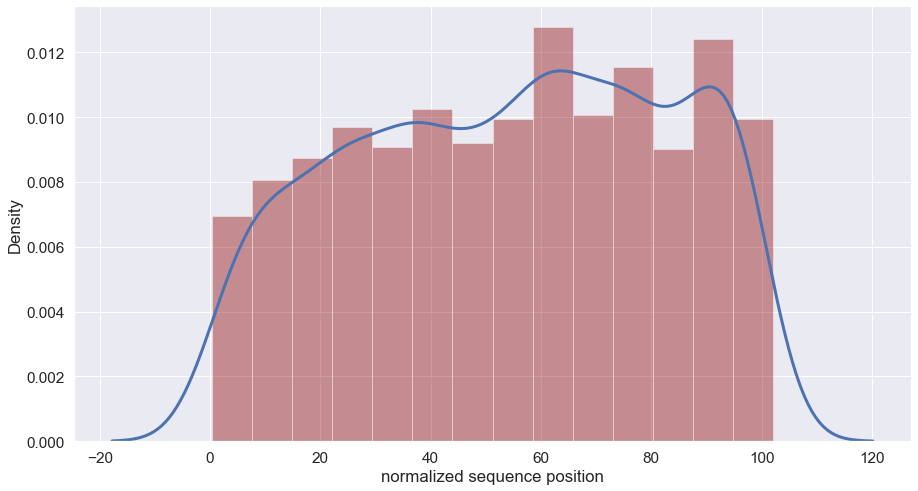

In [14]:
sns.set(font_scale=1.4)
print(data_site_length_scaled[data_site_length_scaled["Cerebrospinal fluid"]==1].shape[0])
plt.figure(figsize=(15,8))      

sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Cerebrospinal fluid"]==1, "scaled_pos"], kde=True,bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'b'})

plt.xlabel("normalized sequence position")

28


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'normalized sequence position')

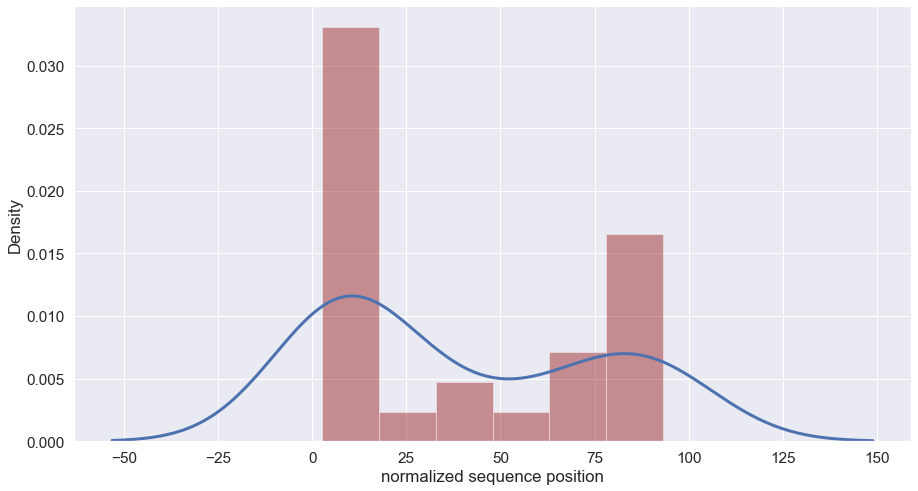

In [15]:
sns.set(font_scale=1.4)
print(data_site_length_scaled[data_site_length_scaled["Cervix"]==1].shape[0])
plt.figure(figsize=(15,8))      

sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Cervix"]==1, "scaled_pos"], kde=True,bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'b'})

plt.xlabel("normalized sequence position")

10988


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'normalized sequence position')

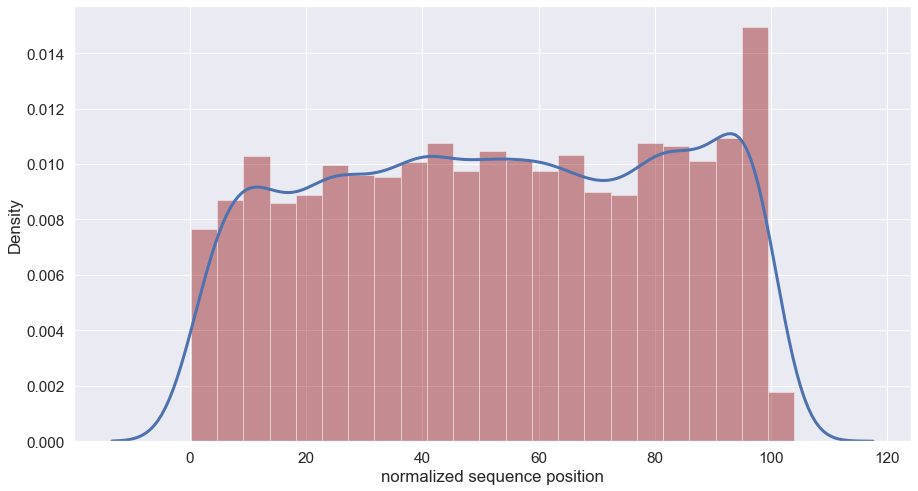

In [16]:
sns.set(font_scale=1.4)
print(data_site_length_scaled[data_site_length_scaled["Colon"]==1].shape[0])
plt.figure(figsize=(15,8))      

sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Colon"]==1, "scaled_pos"], kde=True,bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'b'})

plt.xlabel("normalized sequence position")

44


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'normalized sequence position')

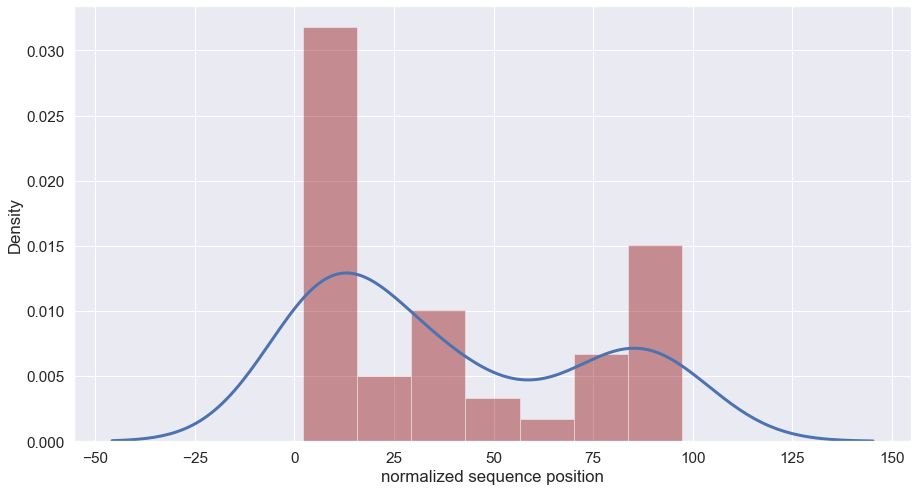

In [17]:
sns.set(font_scale=1.4)
print(data_site_length_scaled[data_site_length_scaled["Dental plaque"]==1].shape[0])
plt.figure(figsize=(15,8))      

sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Dental plaque"]==1, "scaled_pos"], kde=True,bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'b'})

plt.xlabel("normalized sequence position")

64


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'normalized sequence position')

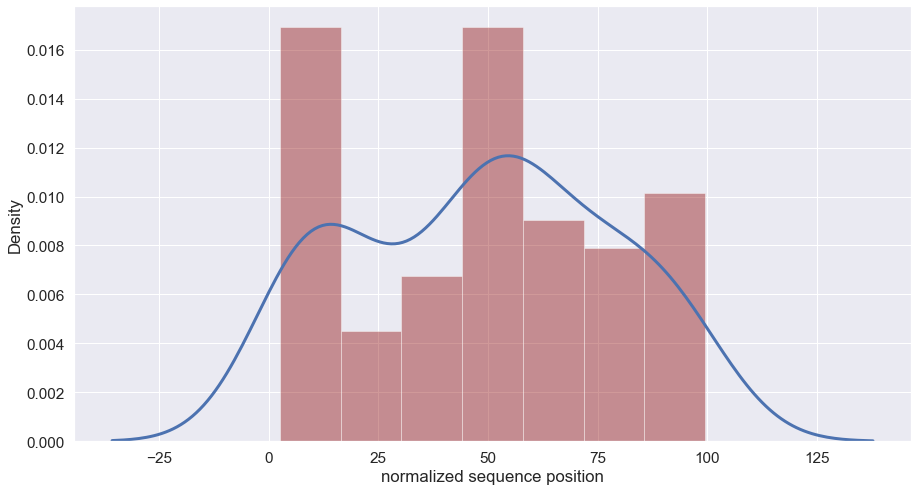

In [18]:
sns.set(font_scale=1.4)
print(data_site_length_scaled[data_site_length_scaled["Esophagus"]==1].shape[0])
plt.figure(figsize=(15,8))      

sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Esophagus"]==1, "scaled_pos"], kde=True,bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'b'})

plt.xlabel("normalized sequence position")

20


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'normalized sequence position')

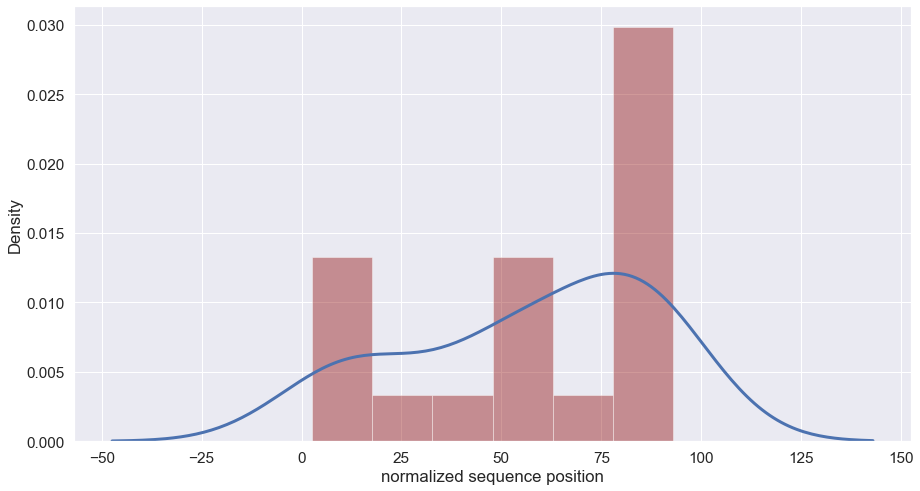

In [19]:
sns.set(font_scale=1.4)
print(data_site_length_scaled[data_site_length_scaled["Eye"]==1].shape[0])
plt.figure(figsize=(15,8))      

sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Eye"]==1, "scaled_pos"], kde=True,bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'b'})

plt.xlabel("normalized sequence position")

1


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


Text(0.5, 0, 'normalized sequence position')

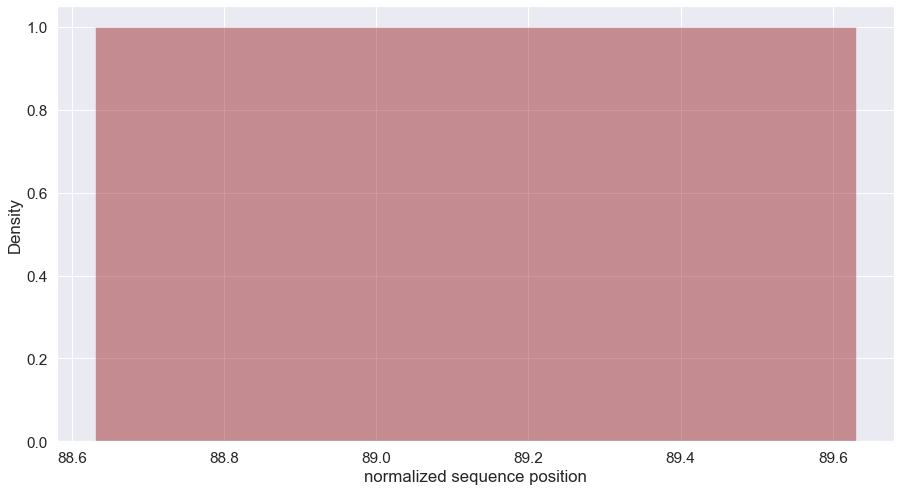

In [20]:
sns.set(font_scale=1.4)
print(data_site_length_scaled[data_site_length_scaled["Follicular fluid"]==1].shape[0])
plt.figure(figsize=(15,8))      

sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Follicular fluid"]==1, "scaled_pos"], kde=True,bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'b'})

plt.xlabel("normalized sequence position")

124


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'normalized sequence position')

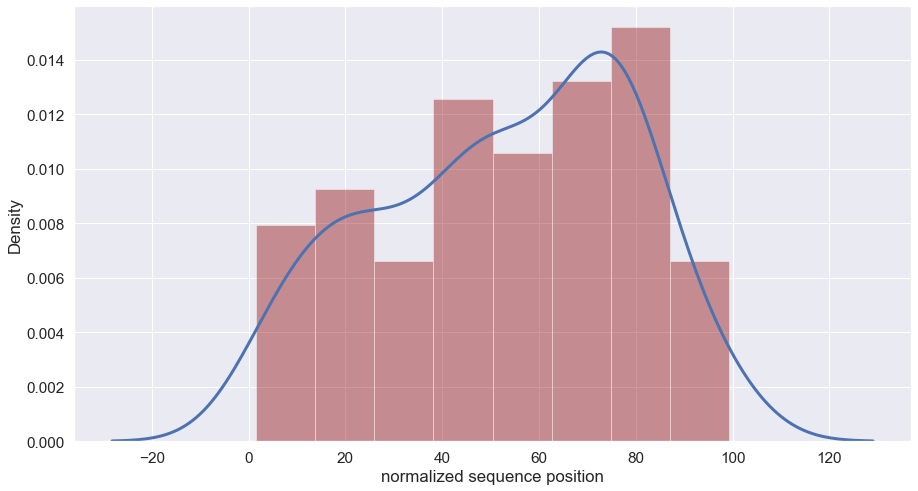

In [21]:
sns.set(font_scale=1.4)
print(data_site_length_scaled[data_site_length_scaled["Heart"]==1].shape[0])
plt.figure(figsize=(15,8))      

sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Heart"]==1, "scaled_pos"], kde=True,bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'b'})

plt.xlabel("normalized sequence position")

80


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'normalized sequence position')

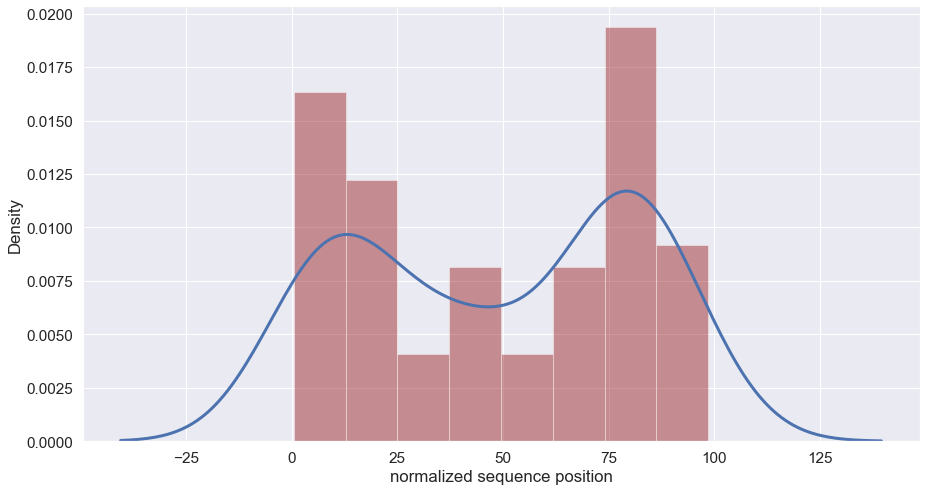

In [22]:
sns.set(font_scale=1.4)
print(data_site_length_scaled[data_site_length_scaled["Hela"]==1].shape[0])
plt.figure(figsize=(15,8))      

sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Hela"]==1, "scaled_pos"], kde=True,bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'b'})

plt.xlabel("normalized sequence position")

927


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'normalized sequence position')

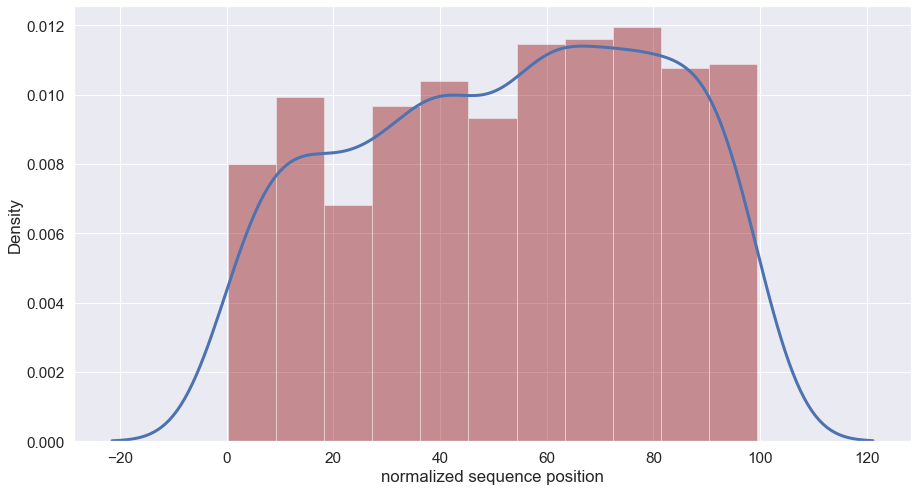

In [23]:
sns.set(font_scale=1.4)
print(data_site_length_scaled[data_site_length_scaled["Kidney"]==1].shape[0])
plt.figure(figsize=(15,8))      

sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Kidney"]==1, "scaled_pos"], kde=True,bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'b'})

plt.xlabel("normalized sequence position")

3740


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'normalized sequence position')

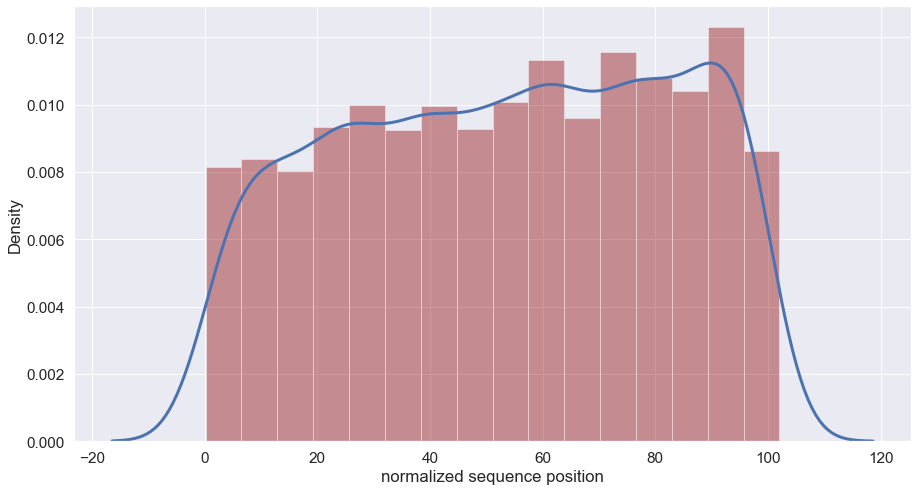

In [24]:
sns.set(font_scale=1.4)
print(data_site_length_scaled[data_site_length_scaled["Liver"]==1].shape[0])
plt.figure(figsize=(15,8))      

sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Liver"]==1, "scaled_pos"], kde=True,bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'b'})

plt.xlabel("normalized sequence position")

4468


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'normalized sequence position')

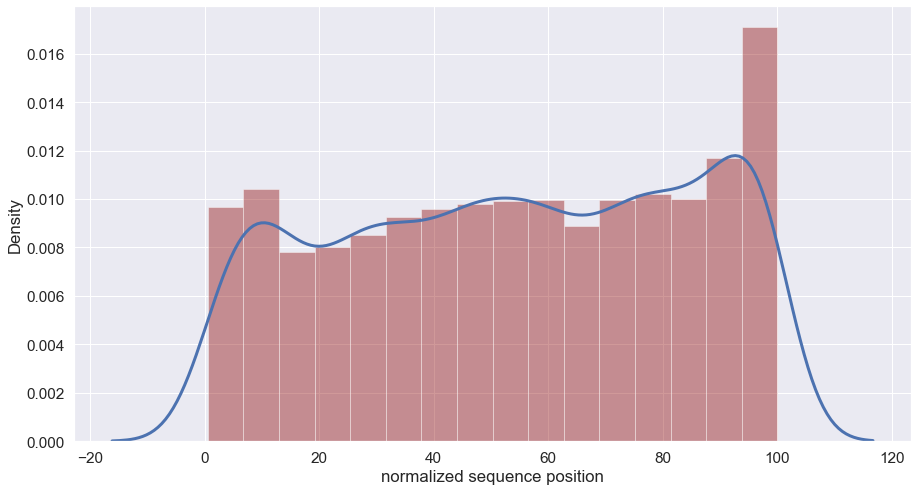

In [25]:
sns.set(font_scale=1.4)
print(data_site_length_scaled[data_site_length_scaled["Lung"]==1].shape[0])
plt.figure(figsize=(15,8))      

sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Lung"]==1, "scaled_pos"], kde=True,bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'b'})

plt.xlabel("normalized sequence position")

6569


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'normalized sequence position')

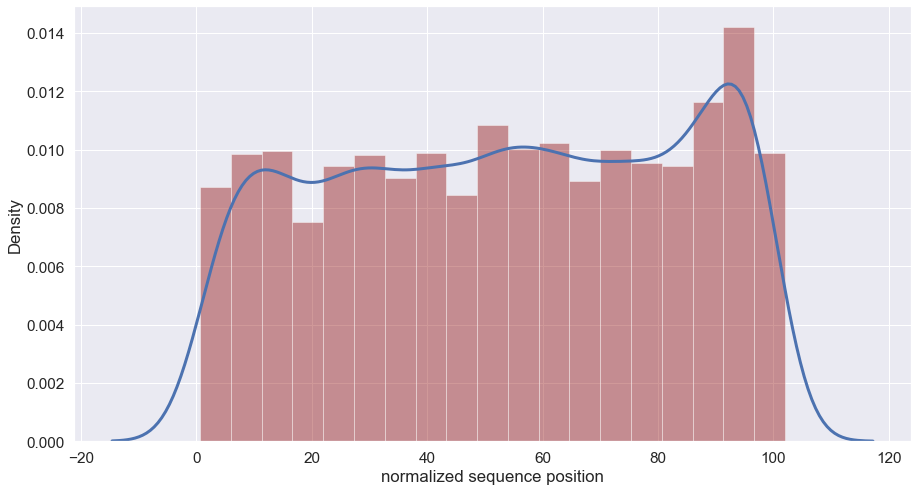

In [26]:
sns.set(font_scale=1.4)
print(data_site_length_scaled[data_site_length_scaled["Lymph node"]==1].shape[0])
plt.figure(figsize=(15,8))      

sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Lymph node"]==1, "scaled_pos"], kde=True,bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'b'})

plt.xlabel("normalized sequence position")

14


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'normalized sequence position')

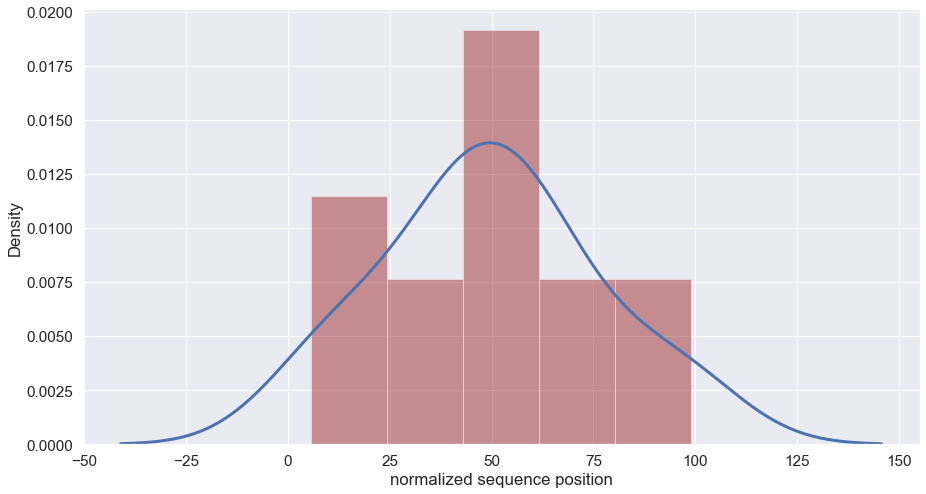

In [27]:
sns.set(font_scale=1.4)
print(data_site_length_scaled[data_site_length_scaled["Menstrual fluid"]==1].shape[0])
plt.figure(figsize=(15,8))      

sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Menstrual fluid"]==1, "scaled_pos"], kde=True,bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'b'})

plt.xlabel("normalized sequence position")

2248


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'normalized sequence position')

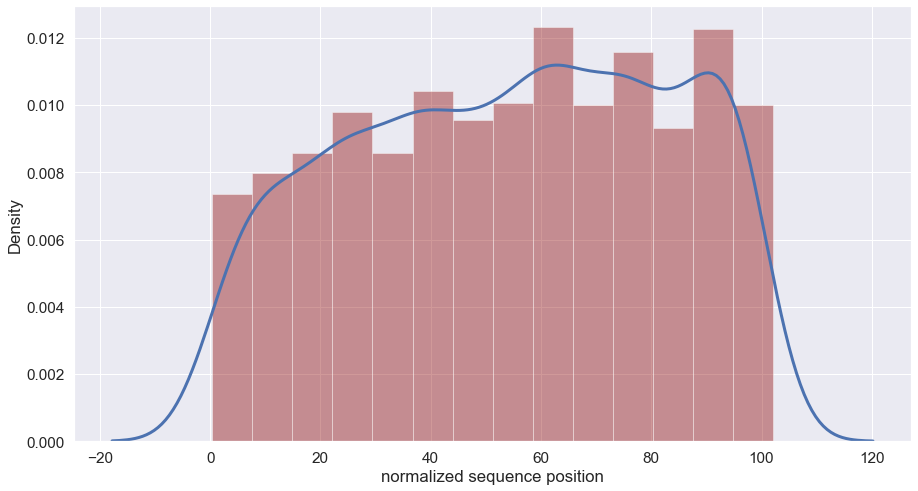

In [28]:
sns.set(font_scale=1.4)
print(data_site_length_scaled[data_site_length_scaled["Monocytes"]==1].shape[0])
plt.figure(figsize=(15,8))      

sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Monocytes"]==1, "scaled_pos"], kde=True,bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'b'})

plt.xlabel("normalized sequence position")

173


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'normalized sequence position')

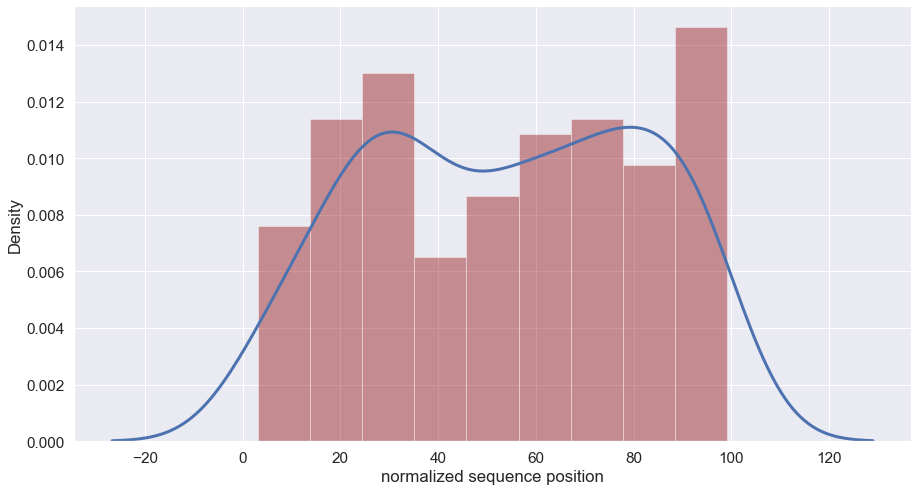

In [29]:
sns.set(font_scale=1.4)
print(data_site_length_scaled[data_site_length_scaled["Nasal polyps"]==1].shape[0])
plt.figure(figsize=(15,8))      

sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Nasal polyps"]==1, "scaled_pos"], kde=True,bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'b'})

plt.xlabel("normalized sequence position")

407


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'normalized sequence position')

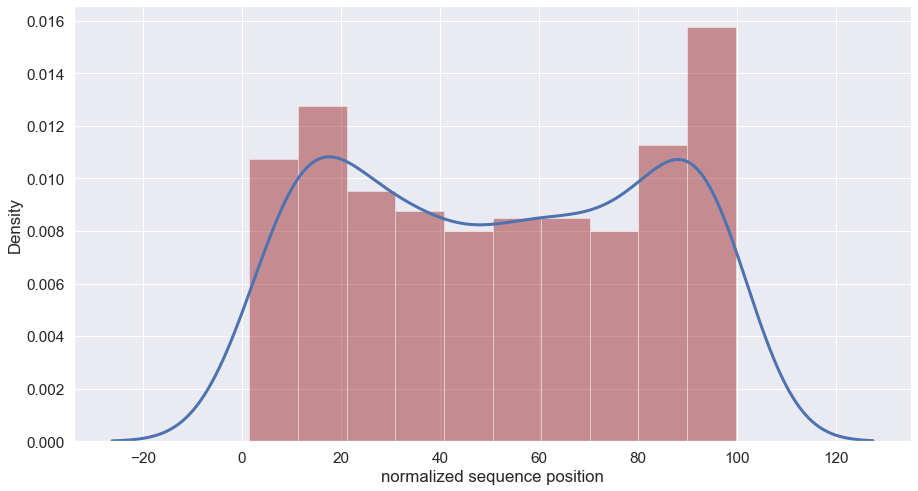

In [30]:
sns.set(font_scale=1.4)
print(data_site_length_scaled[data_site_length_scaled["NK-cells"]==1].shape[0])
plt.figure(figsize=(15,8))      

sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["NK-cells"]==1, "scaled_pos"], kde=True,bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'b'})

plt.xlabel("normalized sequence position")

2188


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'normalized sequence position')

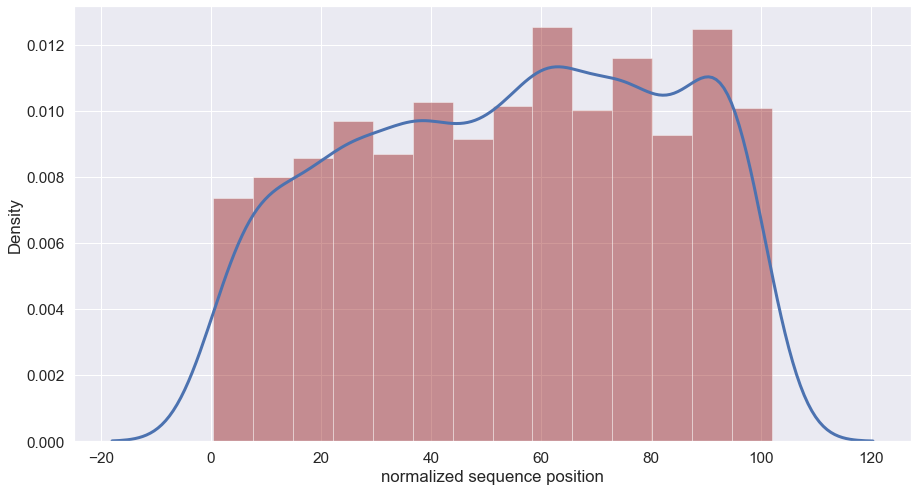

In [31]:
sns.set(font_scale=1.4)
print(data_site_length_scaled[data_site_length_scaled["Ovary"]==1].shape[0])
plt.figure(figsize=(15,8))      

sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Ovary"]==1, "scaled_pos"], kde=True,bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'b'})

plt.xlabel("normalized sequence position")

2438


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'normalized sequence position')

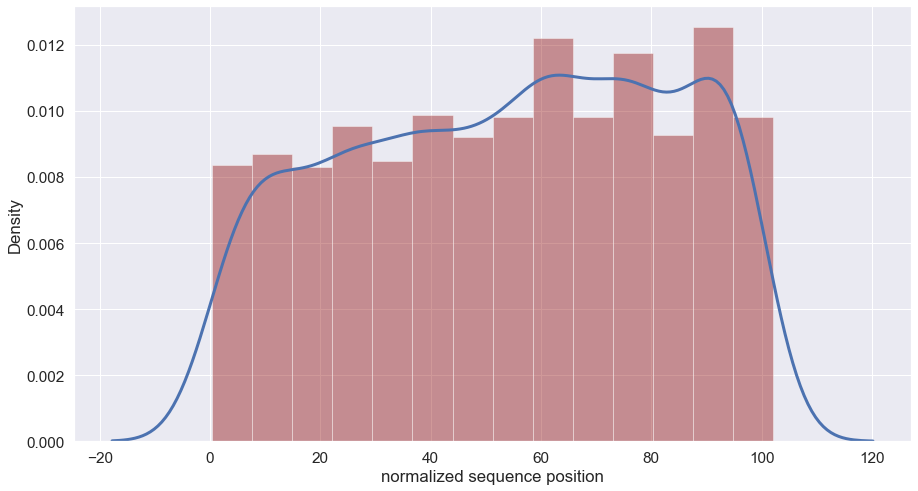

In [32]:
sns.set(font_scale=1.4)
print(data_site_length_scaled[data_site_length_scaled["Pancreas"]==1].shape[0])
plt.figure(figsize=(15,8))      

sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Pancreas"]==1, "scaled_pos"], kde=True,bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'b'})

plt.xlabel("normalized sequence position")

173


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'normalized sequence position')

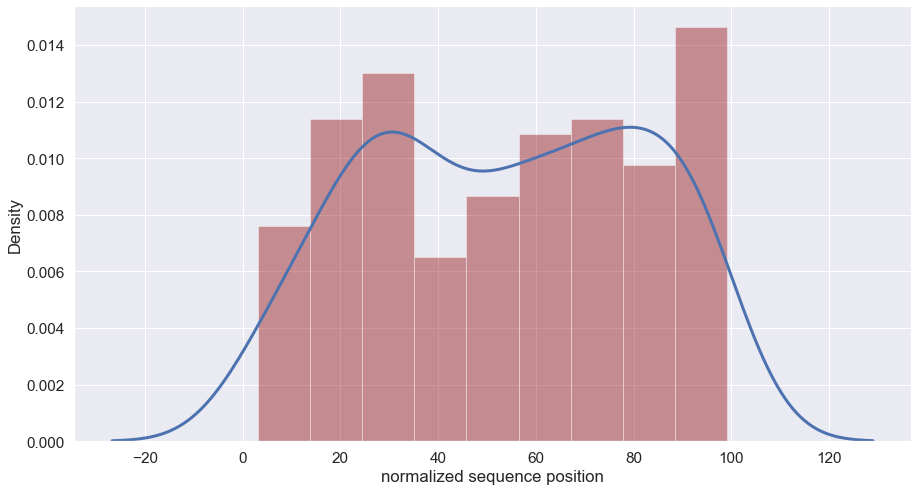

In [33]:
sns.set(font_scale=1.4)
print(data_site_length_scaled[data_site_length_scaled["Palatine tonsils"]==1].shape[0])
plt.figure(figsize=(15,8))      

sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Palatine tonsils"]==1, "scaled_pos"], kde=True,bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'b'})

plt.xlabel("normalized sequence position")

2142


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'normalized sequence position')

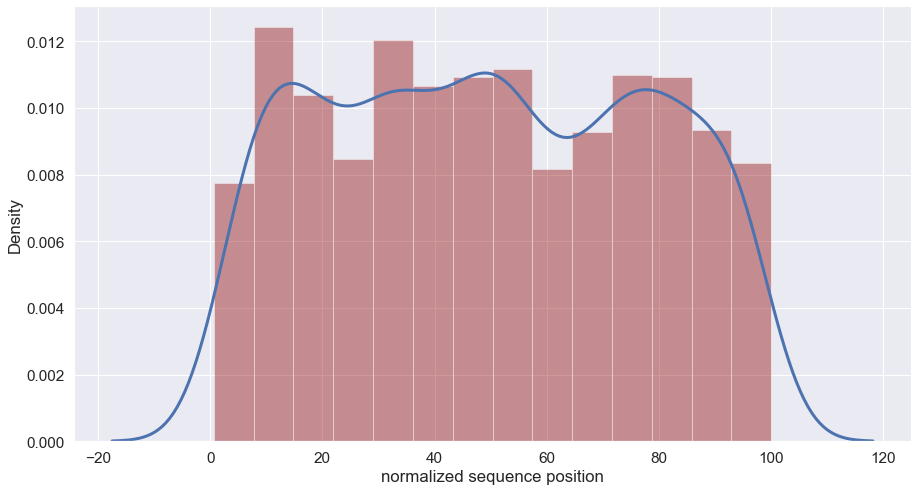

In [34]:
sns.set(font_scale=1.4)
print(data_site_length_scaled[data_site_length_scaled["PBMC"]==1].shape[0])
plt.figure(figsize=(15,8))      

sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["PBMC"]==1, "scaled_pos"], kde=True,bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'b'})

plt.xlabel("normalized sequence position")

2


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'normalized sequence position')

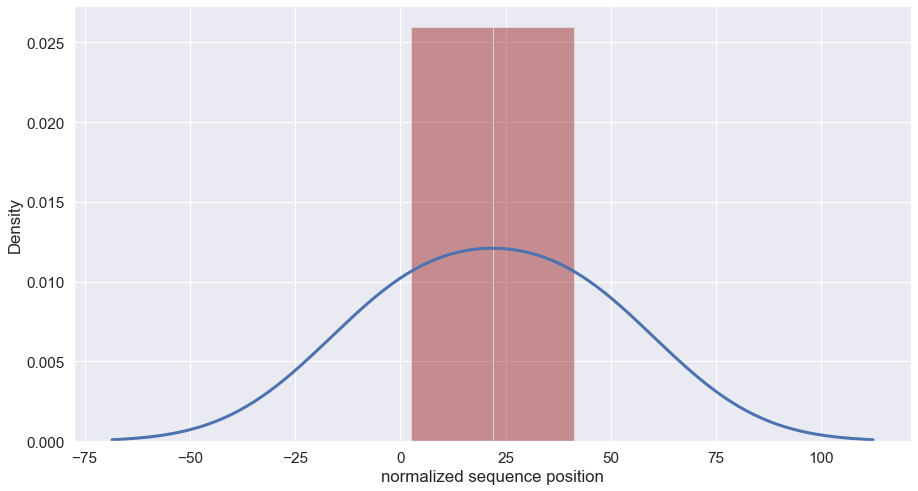

In [35]:
sns.set(font_scale=1.4)
print(data_site_length_scaled[data_site_length_scaled["Peritoneal dialysis fluid"]==1].shape[0])
plt.figure(figsize=(15,8))      

sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Peritoneal dialysis fluid"]==1, "scaled_pos"], kde=True,bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'b'})

plt.xlabel("normalized sequence position")

611


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'normalized sequence position')

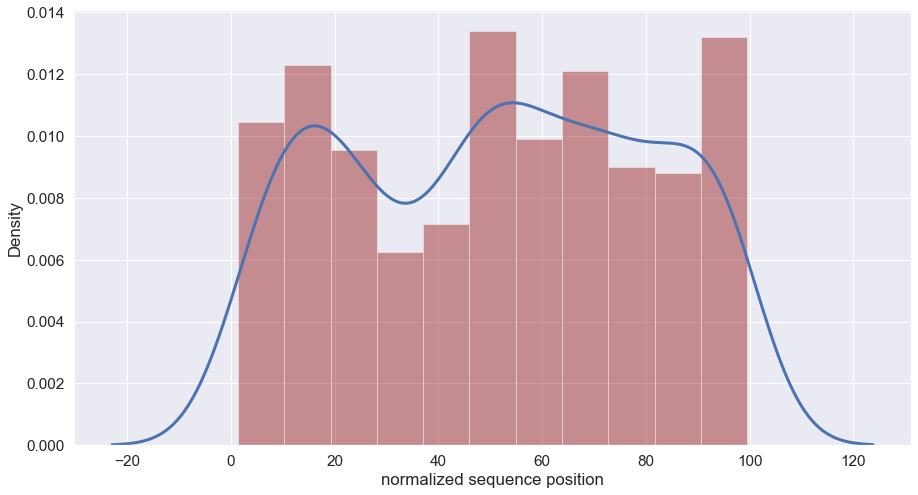

In [36]:
sns.set(font_scale=1.4)
print(data_site_length_scaled[data_site_length_scaled["Adipose tissue"]==1].shape[0])
plt.figure(figsize=(15,8))      

sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Adipose tissue"]==1, "scaled_pos"], kde=True,bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'b'})

plt.xlabel("normalized sequence position")

2051


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'normalized sequence position')

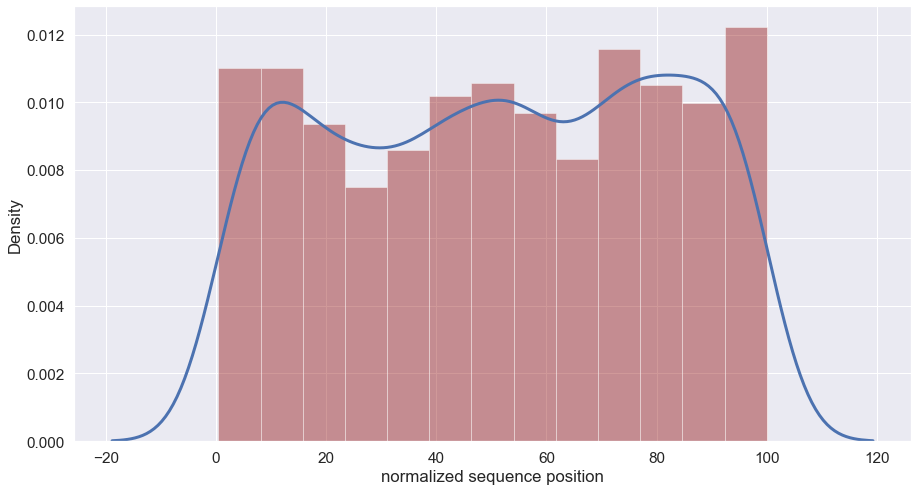

In [37]:
sns.set(font_scale=1.4)
print(data_site_length_scaled[data_site_length_scaled["Placenta"]==1].shape[0])
plt.figure(figsize=(15,8))      

sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Placenta"]==1, "scaled_pos"], kde=True,bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'b'})

plt.xlabel("normalized sequence position")

439


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'normalized sequence position')

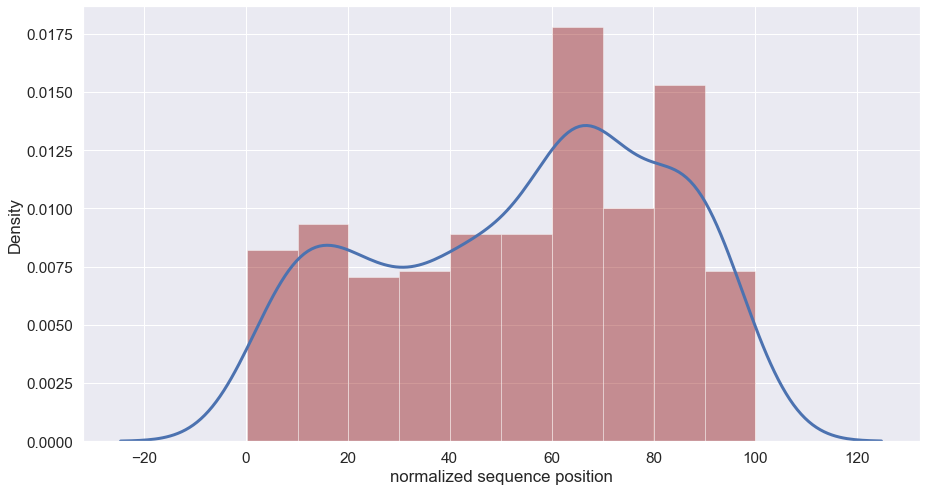

In [38]:
sns.set(font_scale=1.4)
print(data_site_length_scaled[data_site_length_scaled["Skeletal muscle"]==1].shape[0])
plt.figure(figsize=(15,8))      

sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Skeletal muscle"]==1, "scaled_pos"], kde=True,bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'b'})

plt.xlabel("normalized sequence position")

1827


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'normalized sequence position')

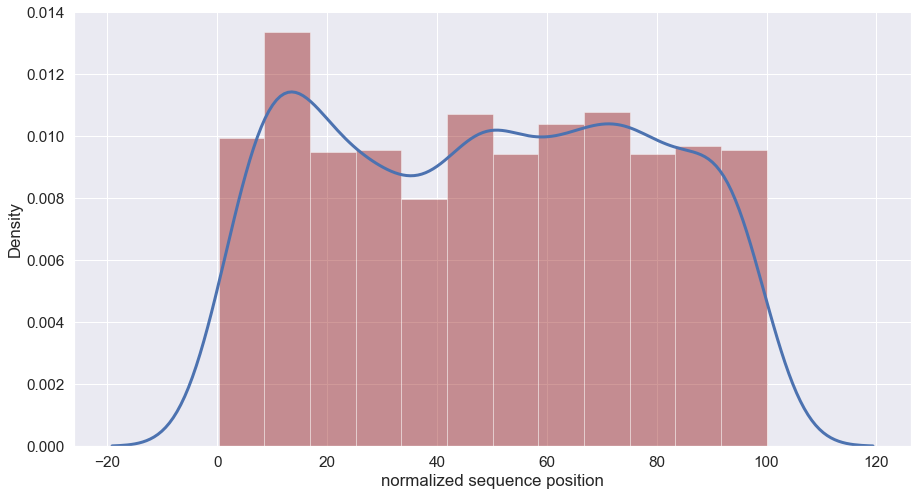

In [39]:
sns.set(font_scale=1.4)
print(data_site_length_scaled[data_site_length_scaled["Skin"]==1].shape[0])
plt.figure(figsize=(15,8))      

sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Skin"]==1, "scaled_pos"], kde=True,bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'b'})

plt.xlabel("normalized sequence position")

358


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'normalized sequence position')

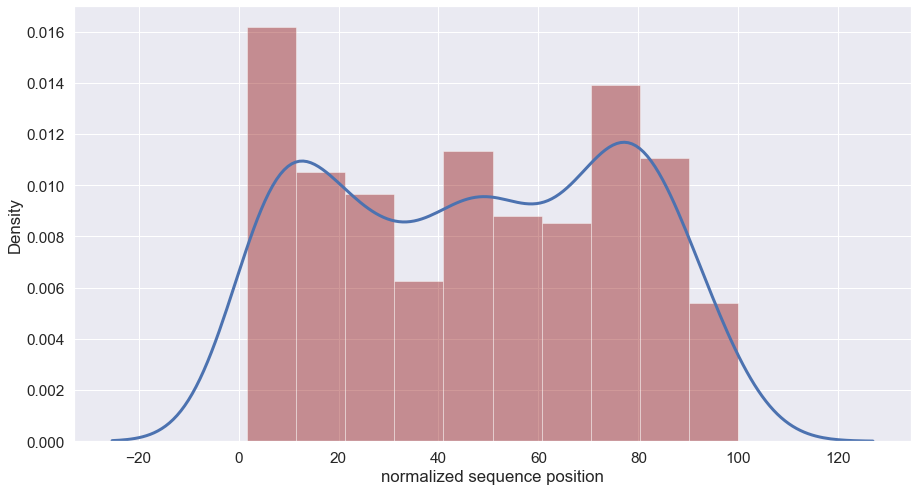

In [40]:
sns.set(font_scale=1.4)
print(data_site_length_scaled[data_site_length_scaled["Small intestine"]==1].shape[0])
plt.figure(figsize=(15,8))      

sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Small intestine"]==1, "scaled_pos"], kde=True,bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'b'})

plt.xlabel("normalized sequence position")

17


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'normalized sequence position')

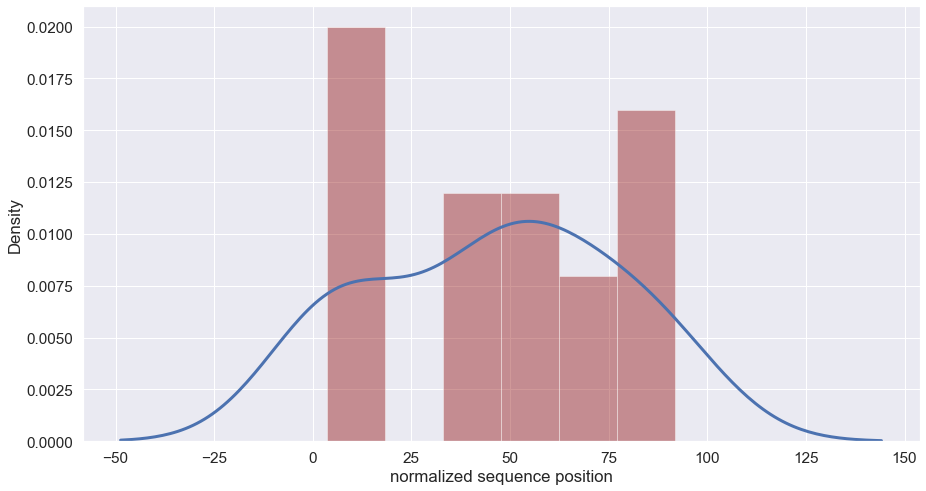

In [41]:
sns.set(font_scale=1.4)
print(data_site_length_scaled[data_site_length_scaled["Synovial tissue"]==1].shape[0])
plt.figure(figsize=(15,8))      

sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Synovial tissue"]==1, "scaled_pos"], kde=True,bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'b'})

plt.xlabel("normalized sequence position")

14


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'normalized sequence position')

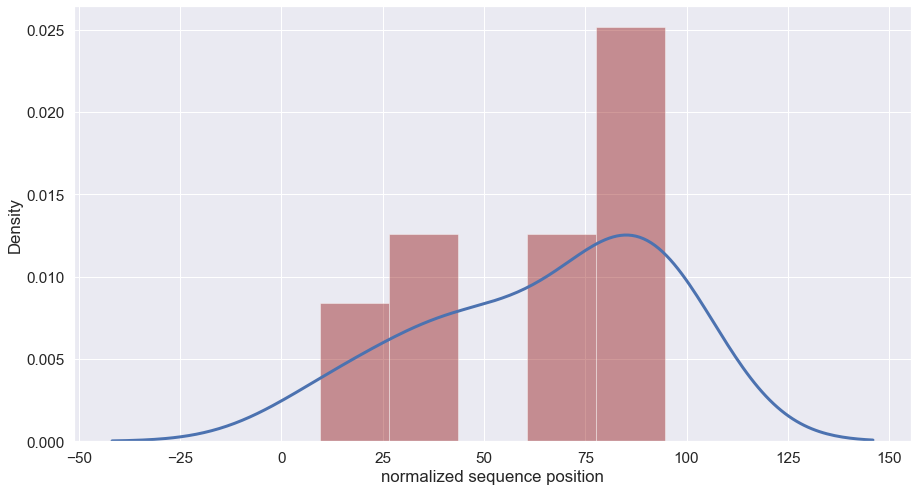

In [42]:
sns.set(font_scale=1.4)
print(data_site_length_scaled[data_site_length_scaled["T-cells"]==1].shape[0])
plt.figure(figsize=(15,8))      

sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["T-cells"]==1, "scaled_pos"], kde=True,bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'b'})

plt.xlabel("normalized sequence position")

1012


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'normalized sequence position')

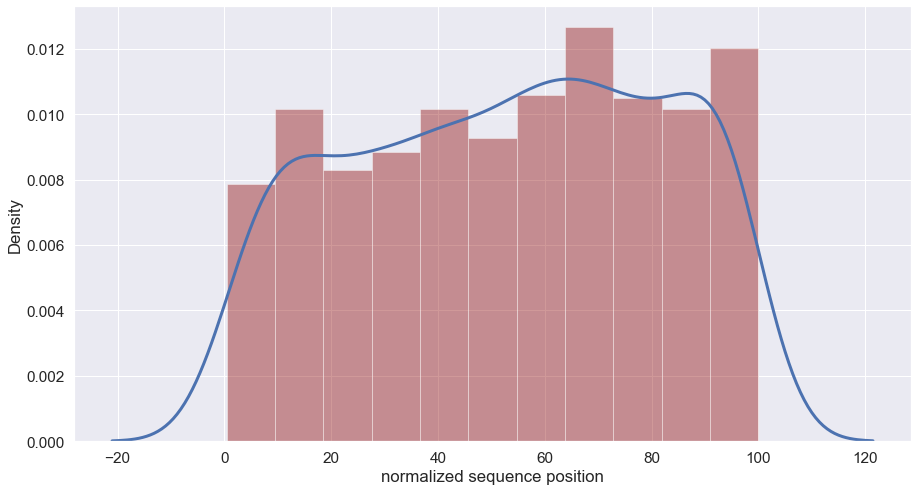

In [43]:
sns.set(font_scale=1.4)
print(data_site_length_scaled[data_site_length_scaled["Testis"]==1].shape[0])
plt.figure(figsize=(15,8))      

sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Testis"]==1, "scaled_pos"], kde=True,bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'b'})

plt.xlabel("normalized sequence position")

1


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


Text(0.5, 0, 'normalized sequence position')

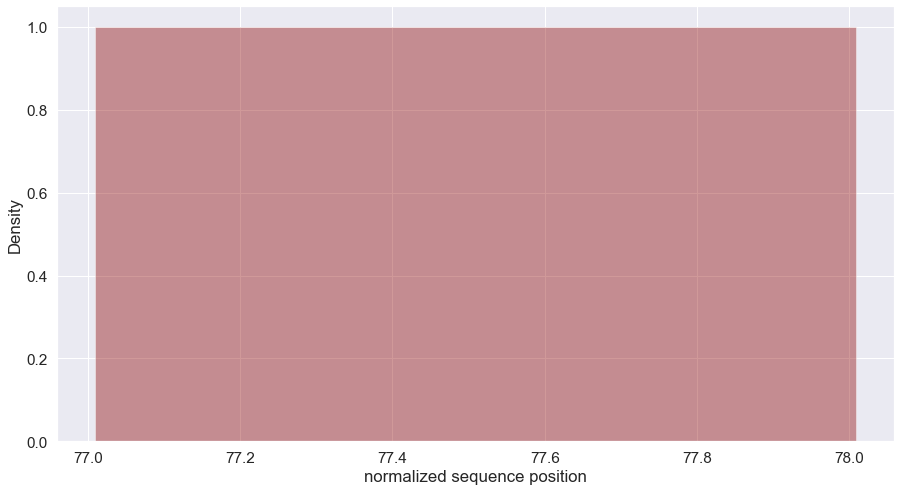

In [44]:
sns.set(font_scale=1.4)
print(data_site_length_scaled[data_site_length_scaled["Tooth"]==1].shape[0])
plt.figure(figsize=(15,8))      

sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Tooth"]==1, "scaled_pos"], kde=True,bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'b'})

plt.xlabel("normalized sequence position")

1357


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'normalized sequence position')

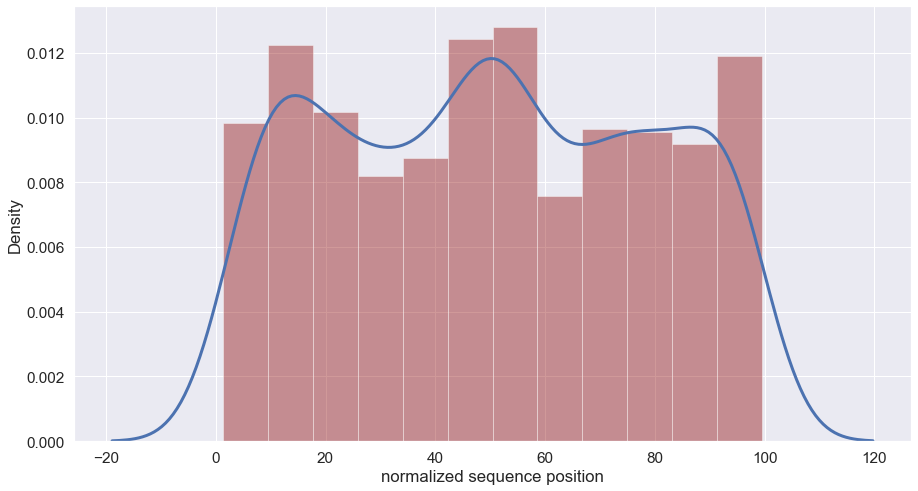

In [45]:
sns.set(font_scale=1.4)
print(data_site_length_scaled[data_site_length_scaled["Umbilical cord"]==1].shape[0])
plt.figure(figsize=(15,8))      

sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Umbilical cord"]==1, "scaled_pos"], kde=True,bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'b'})

plt.xlabel("normalized sequence position")

40


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'normalized sequence position')

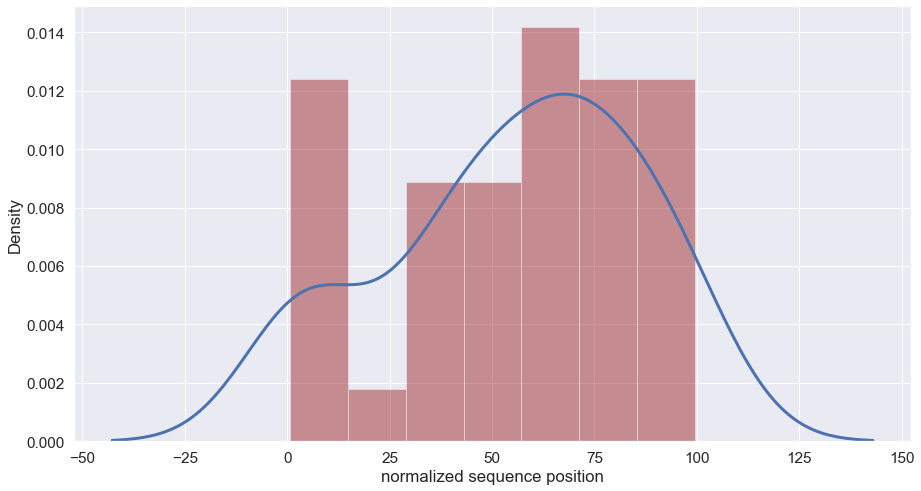

In [46]:
sns.set(font_scale=1.4)
print(data_site_length_scaled[data_site_length_scaled["Ureter"]==1].shape[0])
plt.figure(figsize=(15,8))      

sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Ureter"]==1, "scaled_pos"], kde=True,bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'b'})

plt.xlabel("normalized sequence position")

944


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'normalized sequence position')

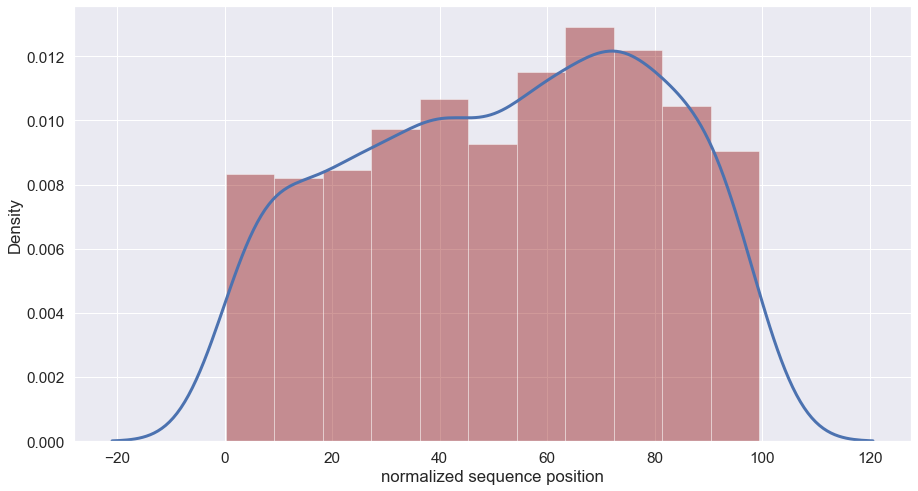

In [47]:
sns.set(font_scale=1.4)
print(data_site_length_scaled[data_site_length_scaled["Urinary bladder"]==1].shape[0])
plt.figure(figsize=(15,8))      

sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Urinary bladder"]==1, "scaled_pos"], kde=True,bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'b'})

plt.xlabel("normalized sequence position")

146


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'normalized sequence position')

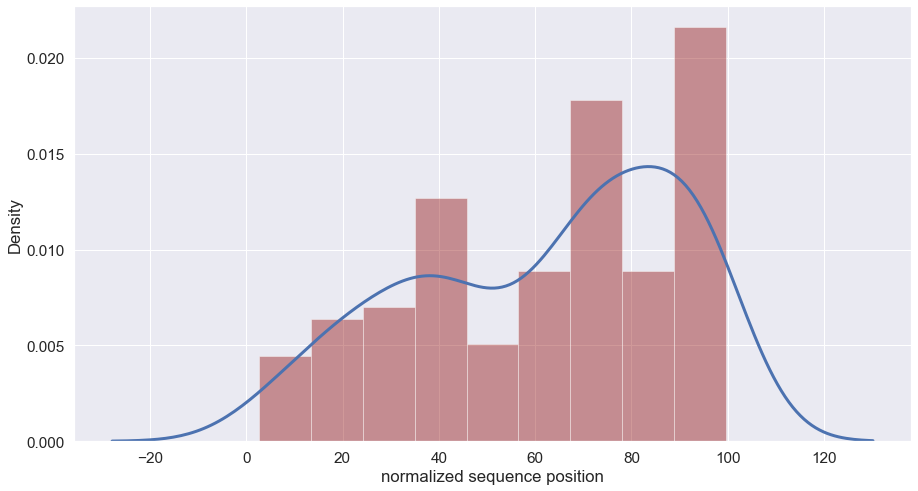

In [48]:
sns.set(font_scale=1.4)
print(data_site_length_scaled[data_site_length_scaled["Urine"]==1].shape[0])
plt.figure(figsize=(15,8))      

sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Urine"]==1, "scaled_pos"], kde=True,bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'b'})

plt.xlabel("normalized sequence position")

In [49]:
five_tissues = pd.DataFrame({})
five_tissues["Colon"] = data_site_length_scaled.loc[data_site_length_scaled["Colon"]==1, "scaled_pos"]
five_tissues["Blood"] = data_site_length_scaled.loc[data_site_length_scaled["Blood"]==1, "scaled_pos"]
five_tissues["Lymph node"] = data_site_length_scaled.loc[data_site_length_scaled["Lymph node"]==1, "scaled_pos"]
five_tissues["Lung"] = data_site_length_scaled.loc[data_site_length_scaled["Lung"]==1, "scaled_pos"]
five_tissues["Liver"] = data_site_length_scaled.loc[data_site_length_scaled["Liver"]==1, "scaled_pos"]
five_tissues

,Colon,Blood,Lymph node,Lung,Liver
17,60.945274,NaN,NaN,NaN,NaN
18,61.318408,NaN,NaN,NaN,NaN
19,94.402985,NaN,NaN,NaN,NaN
20,94.651741,NaN,NaN,NaN,NaN
21,94.776119,NaN,NaN,NaN,NaN
...,...,...,...,...,...
23889,42.901716,NaN,42.901716,NaN,42.901716
23891,52.262090,NaN,NaN,NaN,NaN
23892,52.574103,NaN,NaN,NaN,NaN
23893,73.673674,NaN,NaN,NaN,NaN


In [50]:
data_site_length_scaled.loc[data_site_length_scaled["Colon"]==1, "scaled_pos"]

17       60.945274
18       61.318408
19       94.402985
20       94.651741
21       94.776119
           ...    
23889    42.901716
23891    52.262090
23892    52.574103
23893    73.673674
23894    92.592593
Name: scaled_pos, Length: 10988, dtype: float64

In [51]:
data_site_length_scaled.loc[data_site_length_scaled["Blood"]==1, "scaled_pos"]

5        43.965517
8        93.043478
9        43.103448
10       42.982456
11       43.965517
           ...    
23882    78.475336
23883    94.768311
23885    59.553831
23886    70.223084
23888    71.968962
Name: scaled_pos, Length: 7069, dtype: float64

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for ker

Text(0.5, 0, 'normalized sequence position')

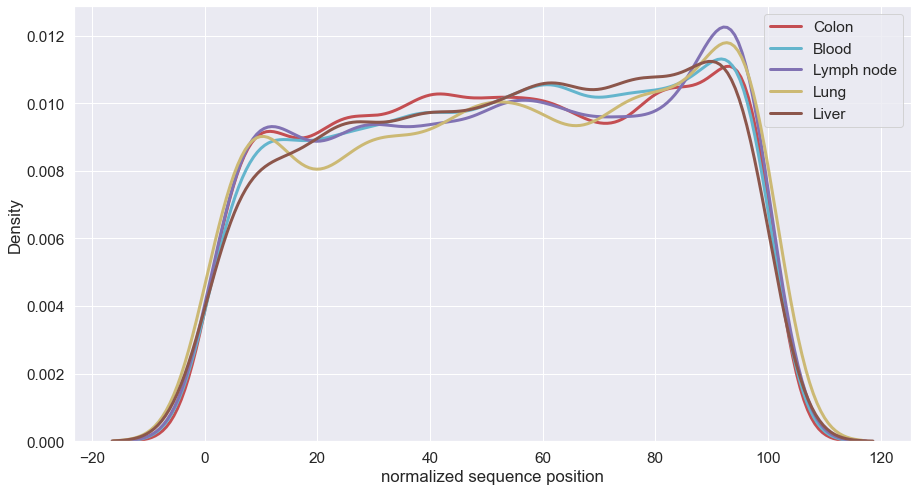

In [52]:
plt.figure(figsize=(15,8))      

plot1 = sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Colon"]==1, :]["scaled_pos"], hist=False, kde=True, label="Colon", bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'r'})
plot2 = sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Blood"]==1, :]["scaled_pos"], hist=False,kde=True, label="Blood",bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'c'})
plot3 = sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Lymph node"]==1, :]["scaled_pos"], hist=False,kde=True, label="Lymph node",bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'m'})
plot4 = sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Lung"]==1, :]["scaled_pos"], hist=False,kde=True, label="Lung",bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'y'})
plot5 = sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Liver"]==1, :]["scaled_pos"], hist=False,kde=True,label="Liver", bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'tab:brown'})
plt.legend()
plt.xlabel("normalized sequence position")
#plt.savefig("WP1 patterns5.png", format="png", bbox_inches="tight")

In [53]:
all_tissues = pd.DataFrame({})
list_tissues_STY = ["Adipose tissue", "B-cells", "Blood", "Bone", "Brain", "Breast",
                "Cerebrospinal fluid", "Cervix", "Colon",
                "Dental plaque", "Esophagus", "Eye", "Follicular fluid", "Heart", "Hela", "Kidney",
                "Liver", "Lung", "Lymph node", "Menstrual fluid", "Monocytes", "Nasal polyps",
               "NK-cells", "Ovary", "Pancreas", "Palatine tonsils", "Parotid gland", "PBMC",
                "Peritoneal dialysis fluid", "Placenta", "Skeletal muscle", "Skin", "Small intestine",
               "Synovial tissue", "T-cells", "Testis", "Tooth", "Umbilical cord", "Ureter",
               "Urinary bladder", "Urine"]
for tissue in list_tissues_STY:
    all_tissues[tissue] = data_site_length_scaled.loc[data_site_length_scaled[tissue]==1, "scaled_pos"]
    
all_tissues

,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,Cerebrospinal fluid,Cervix,Colon,Dental plaque,...,Skin,Small intestine,Synovial tissue,T-cells,Testis,Tooth,Umbilical cord,Ureter,Urinary bladder,Urine
94,87.430168,NaN,87.430168,NaN,87.430168,NaN,87.430168,NaN,87.430168,NaN,...,NaN,NaN,NaN,NaN,87.430168,NaN,87.430168,NaN,NaN,NaN
97,98.789572,NaN,NaN,NaN,NaN,98.789572,NaN,NaN,NaN,NaN,...,98.789572,NaN,NaN,NaN,NaN,NaN,98.789572,NaN,NaN,NaN
144,72.509960,NaN,72.509960,NaN,NaN,NaN,NaN,NaN,72.509960,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,72.509960,NaN,NaN,NaN
156,7.396450,NaN,7.396450,NaN,NaN,NaN,NaN,NaN,7.396450,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.396450,NaN,NaN,NaN
242,4.162103,4.162103,4.162103,NaN,NaN,NaN,NaN,NaN,4.162103,NaN,...,4.162103,NaN,NaN,NaN,4.162103,NaN,4.162103,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23479,2.203065,NaN,2.203065,NaN,NaN,NaN,NaN,NaN,2.203065,NaN,...,2.203065,NaN,NaN,NaN,NaN,NaN,2.203065,NaN,NaN,NaN
23482,40.804598,NaN,40.804598,NaN,40.804598,NaN,NaN,NaN,40.804598,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.804598,NaN,NaN,NaN
23561,89.050701,NaN,89.050701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,89.050701,NaN,NaN,NaN,NaN,NaN,89.050701,NaN,NaN,NaN
23784,98.467433,98.467433,98.467433,NaN,98.467433,NaN,98.467433,NaN,98.467433,NaN,...,NaN,NaN,NaN,NaN,98.467433,NaN,98.467433,NaN,98.467433,NaN


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for ker

Text(0.5, 0, 'normalized sequence position')

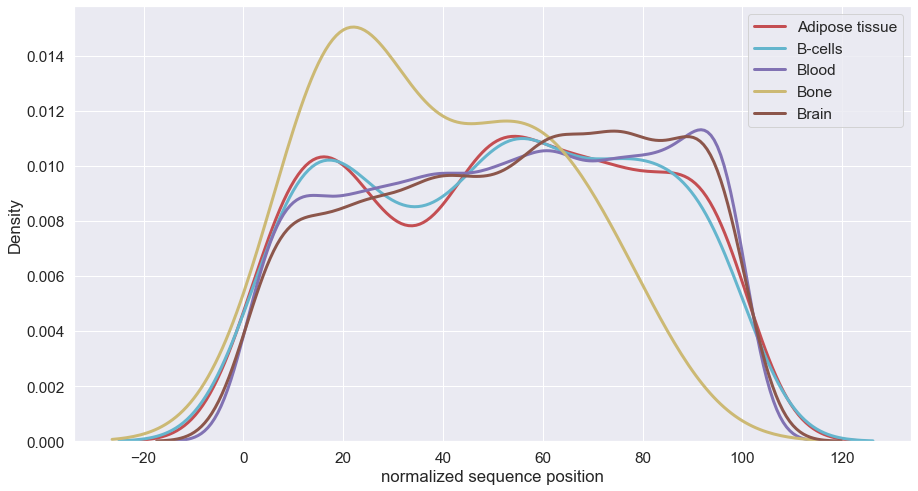

In [54]:
plt.figure(figsize=(15,8))      

plot1 = sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Adipose tissue"]==1, :]["scaled_pos"], hist=False, kde=True, label="Adipose tissue", bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'r'})
plot2 = sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["B-cells"]==1, :]["scaled_pos"], hist=False,kde=True, label="B-cells",bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'c'})
plot3 = sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Blood"]==1, :]["scaled_pos"], hist=False,kde=True, label="Blood",bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'m'})
plot4 = sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Bone"]==1, :]["scaled_pos"], hist=False,kde=True, label="Bone",bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'y'})
plot5 = sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Brain"]==1, :]["scaled_pos"], hist=False,kde=True,label="Brain", bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'tab:brown'})
plt.legend()
plt.xlabel("normalized sequence position")
#plt.savefig("WP1 patterns_all1.png", format="png", bbox_inches="tight")

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for ker

Text(0.5, 0, 'normalized sequence position')

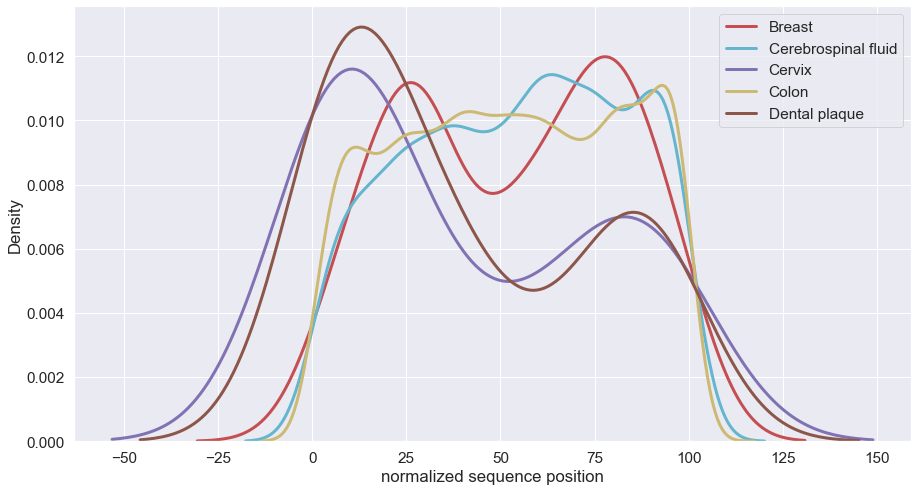

In [55]:
plt.figure(figsize=(15,8))      

plot1 = sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Breast"]==1, :]["scaled_pos"], hist=False, kde=True, label="Breast", bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'r'})
plot2 = sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Cerebrospinal fluid"]==1, :]["scaled_pos"], hist=False,kde=True, label="Cerebrospinal fluid",bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'c'})
plot3 = sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Cervix"]==1, :]["scaled_pos"], hist=False,kde=True, label="Cervix",bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'m'})
plot4 = sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Colon"]==1, :]["scaled_pos"], hist=False,kde=True, label="Colon",bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'y'})
plot5 = sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Dental plaque"]==1, :]["scaled_pos"], hist=False,kde=True,label="Dental plaque", bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'tab:brown'})
plt.legend()
plt.xlabel("normalized sequence position")
#plt.savefig("WP1 patterns_all2.png", format="png", bbox_inches="tight")

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for ker

Text(0.5, 0, 'normalized sequence position')

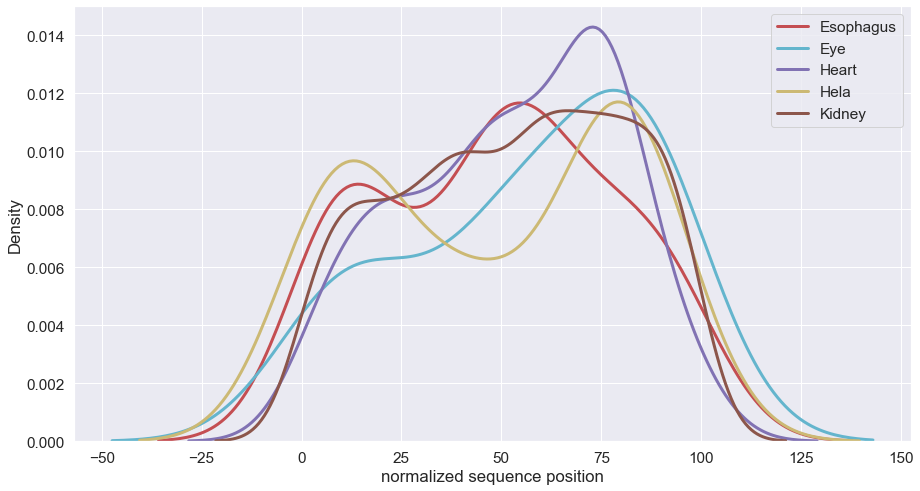

In [56]:
plt.figure(figsize=(15,8))      

plot1 = sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Esophagus"]==1, :]["scaled_pos"], hist=False, kde=True, label="Esophagus", bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'r'})
plot2 = sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Eye"]==1, :]["scaled_pos"], hist=False,kde=True, label="Eye",bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'c'})
plot3 = sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Heart"]==1, :]["scaled_pos"], hist=False,kde=True, label="Heart",bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'m'})
plot4 = sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Hela"]==1, :]["scaled_pos"], hist=False,kde=True, label="Hela",bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'y'})
plot5 = sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Kidney"]==1, :]["scaled_pos"], hist=False,kde=True,label="Kidney", bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'tab:brown'})
plt.legend()
plt.xlabel("normalized sequence position")
#plt.savefig("WP1 patterns_all3.png", format="png", bbox_inches="tight")

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for ker

Text(0.5, 0, 'normalized sequence position')

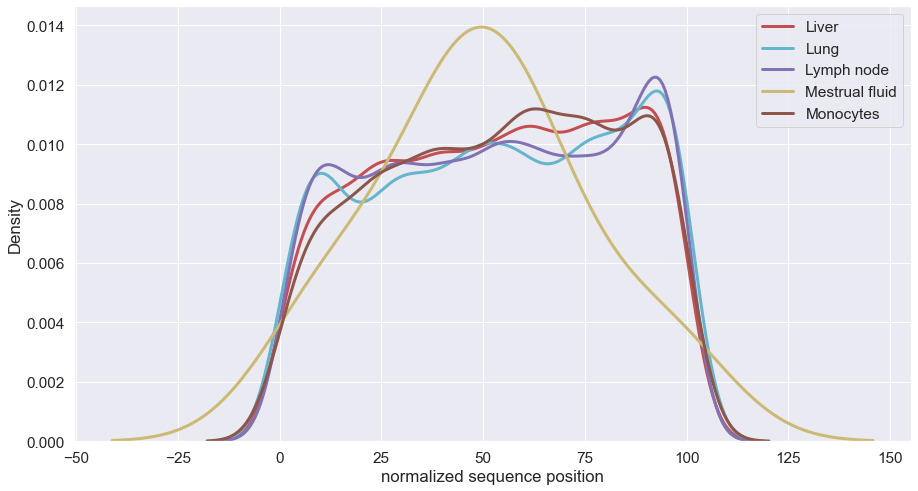

In [57]:
plt.figure(figsize=(15,8))      

plot1 = sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Liver"]==1, :]["scaled_pos"], hist=False, kde=True, label="Liver", bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'r'})
plot2 = sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Lung"]==1, :]["scaled_pos"], hist=False,kde=True, label="Lung",bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'c'})
plot3 = sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Lymph node"]==1, :]["scaled_pos"], hist=False,kde=True, label="Lymph node",bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'m'})
plot4 = sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Menstrual fluid"]==1, :]["scaled_pos"], hist=False,kde=True, label="Mestrual fluid",bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'y'})
plot5 = sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Monocytes"]==1, :]["scaled_pos"], hist=False,kde=True,label="Monocytes", bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'tab:brown'})
plt.legend()
plt.xlabel("normalized sequence position")
#plt.savefig("WP1 patterns_all4.png", format="png", bbox_inches="tight")

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for ker

Text(0.5, 0, 'normalized sequence position')

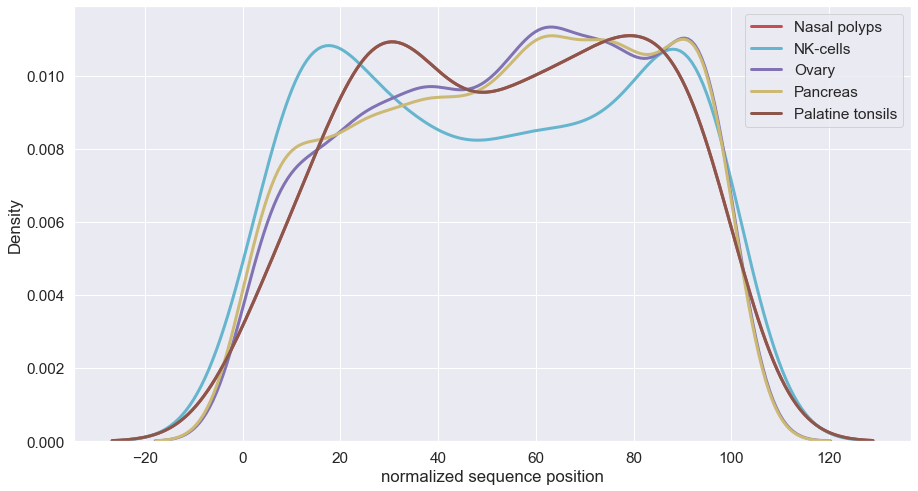

In [58]:
plt.figure(figsize=(15,8))      

plot1 = sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Nasal polyps"]==1, :]["scaled_pos"], hist=False, kde=True, label="Nasal polyps", bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'r'})
plot2 = sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["NK-cells"]==1, :]["scaled_pos"], hist=False,kde=True, label="NK-cells",bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'c'})
plot3 = sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Ovary"]==1, :]["scaled_pos"], hist=False,kde=True, label="Ovary",bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'m'})
plot4 = sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Pancreas"]==1, :]["scaled_pos"], hist=False,kde=True, label="Pancreas",bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'y'})
plot5 = sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Palatine tonsils"]==1, :]["scaled_pos"], hist=False,kde=True,label="Palatine tonsils", bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'tab:brown'})
plt.legend()
plt.xlabel("normalized sequence position")
#plt.savefig("WP1 patterns_all5.png", format="png", bbox_inches="tight")

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for ker

Text(0.5, 0, 'normalized sequence position')

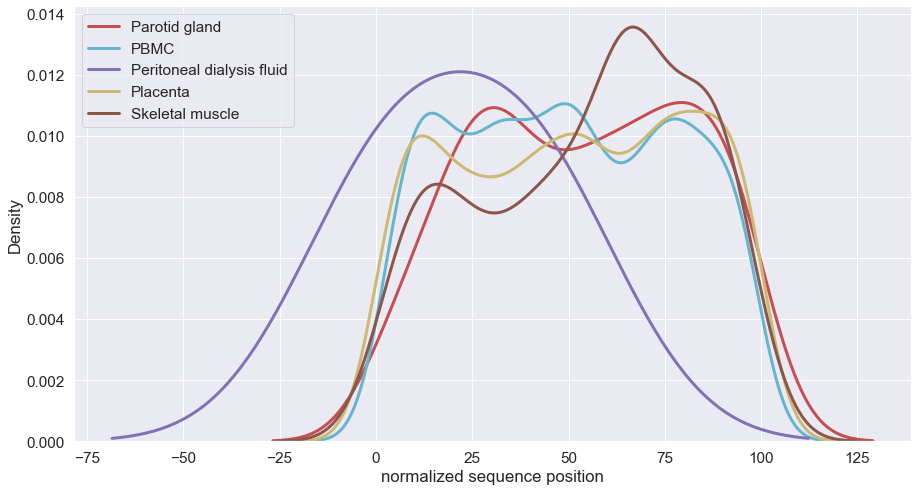

In [59]:
plt.figure(figsize=(15,8))      

plot1 = sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Parotid gland"]==1, :]["scaled_pos"], hist=False, kde=True, label="Parotid gland", bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'r'})
plot2 = sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["PBMC"]==1, :]["scaled_pos"], hist=False,kde=True, label="PBMC",bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'c'})
plot3 = sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Peritoneal dialysis fluid"]==1, :]["scaled_pos"], hist=False,kde=True, label="Peritoneal dialysis fluid",bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'m'})
plot4 = sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Placenta"]==1, :]["scaled_pos"], hist=False,kde=True, label="Placenta",bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'y'})
plot5 = sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Skeletal muscle"]==1, :]["scaled_pos"], hist=False,kde=True,label="Skeletal muscle", bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'tab:brown'})
plt.legend()
plt.xlabel("normalized sequence position")
#plt.savefig("WP1 patterns_all6.png", format="png", bbox_inches="tight")

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for ker

Text(0.5, 0, 'normalized sequence position')

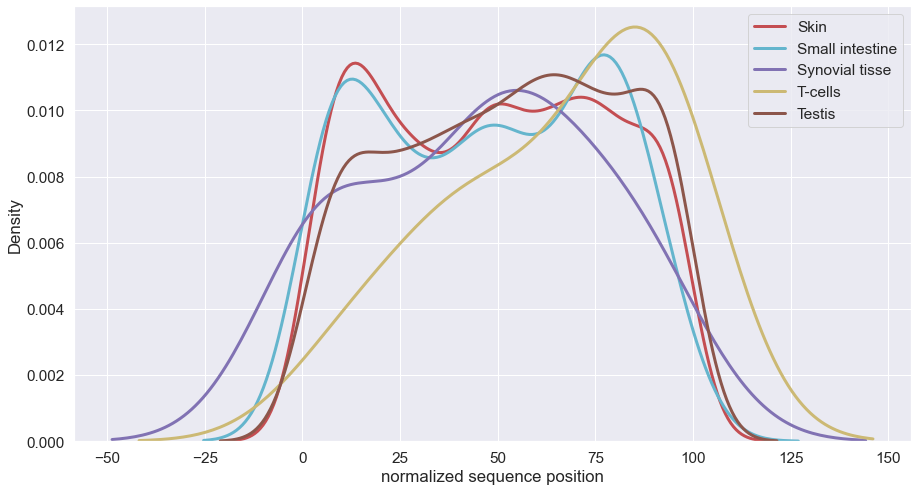

In [60]:
plt.figure(figsize=(15,8))      

plot1 = sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Skin"]==1, :]["scaled_pos"], hist=False, kde=True, label="Skin", bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'r'})
plot2 = sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Small intestine"]==1, :]["scaled_pos"], hist=False,kde=True, label="Small intestine",bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'c'})
plot3 = sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Synovial tissue"]==1, :]["scaled_pos"], hist=False,kde=True, label="Synovial tisse",bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'m'})
plot4 = sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["T-cells"]==1, :]["scaled_pos"], hist=False,kde=True, label="T-cells",bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'y'})
plot5 = sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Testis"]==1, :]["scaled_pos"], hist=False,kde=True,label="Testis", bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'tab:brown'})

plt.legend()
plt.xlabel("normalized sequence position")
#plt.savefig("WP1 patterns_all7.png", format="png", bbox_inches="tight")

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplo

Text(0.5, 0, 'normalized sequence position')

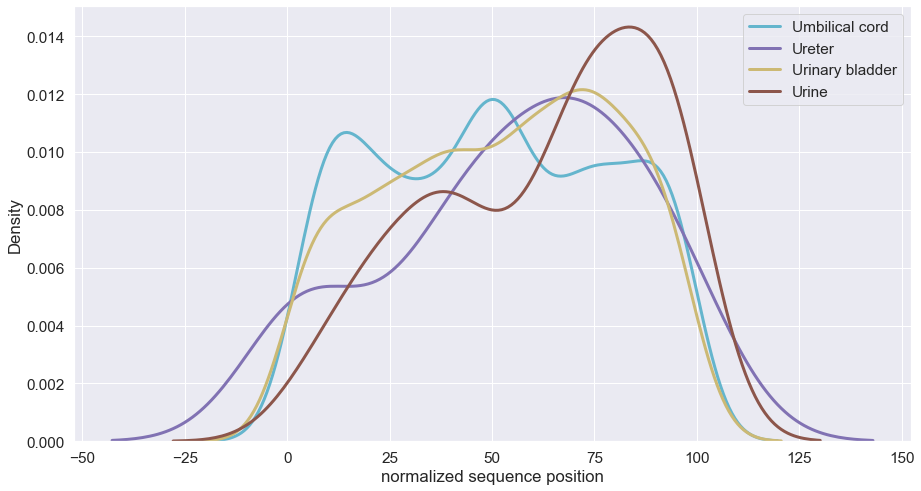

In [61]:
plt.figure(figsize=(15,8))      

plot1 = sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Tooth"]==1, :]["scaled_pos"], hist=False, kde=True, label="Tooth", bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'r'})
plot2 = sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Umbilical cord"]==1, :]["scaled_pos"], hist=False,kde=True, label="Umbilical cord",bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'c'})
plot3 = sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Ureter"]==1, :]["scaled_pos"], hist=False,kde=True, label="Ureter",bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'m'})
plot4 = sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Urinary bladder"]==1, :]["scaled_pos"], hist=False,kde=True, label="Urinary bladder",bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'y'})
plot5 = sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Urine"]==1, :]["scaled_pos"], hist=False,kde=True,label="Urine", bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'tab:brown'})

plt.legend()
plt.xlabel("normalized sequence position")
#plt.savefig("WP1 patterns_all8.png", format="png", bbox_inches="tight")

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for ker

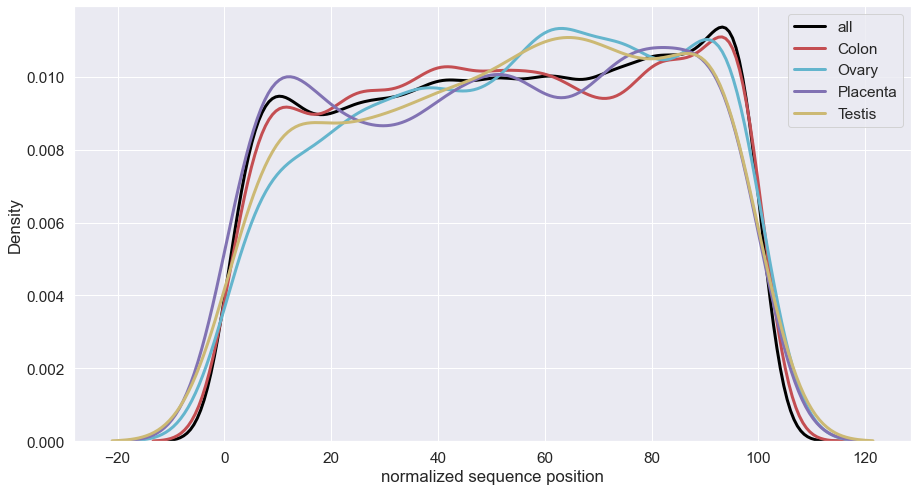

In [66]:
plt.figure(figsize=(15,8))      

plot_all = sns.distplot(data_site_length_scaled["scaled_pos"], hist=False, kde = True, label="all", bins="auto", color="darkred",
                       kde_kws={"linewidth": 3, "color": "black"})

plot1 = sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Colon"]==1, :]["scaled_pos"], hist=False, kde=True, label="Colon", bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'r'})
plot2 = sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Ovary"]==1, :]["scaled_pos"], hist=False,kde=True, label="Ovary",bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'c'})
plot3 = sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Placenta"]==1, :]["scaled_pos"], hist=False,kde=True, label="Placenta",bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'m'})
plot4 = sns.distplot(data_site_length_scaled.loc[data_site_length_scaled["Testis"]==1, :]["scaled_pos"], hist=False,kde=True, label="Testis",bins='auto',color='darkred',\
             kde_kws={'linewidth': 3,'color':'y'})

plt.legend()
plt.xlabel("normalized sequence position")
#plt.savefig("WP1 patterns_all.png", format="png", bbox_inches="tight")

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'normalized sequence position')

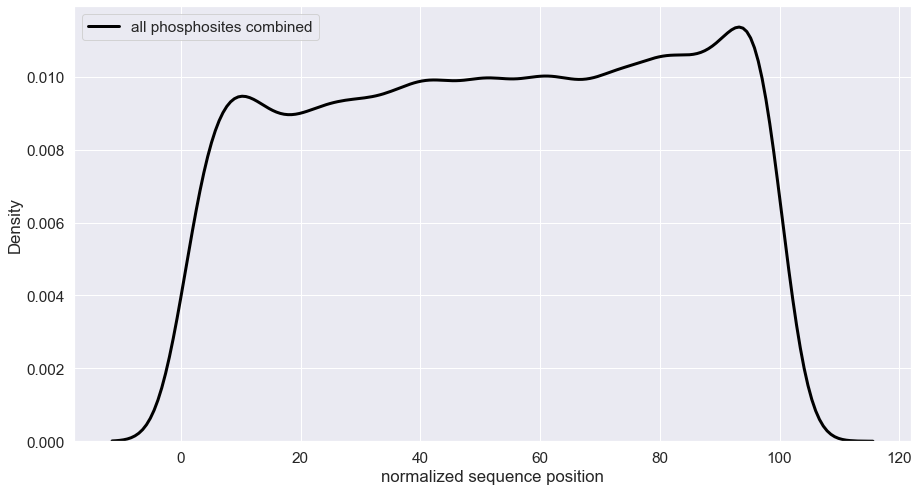

In [63]:
plt.figure(figsize=(15,8))      

plot_all = sns.distplot(data_site_length_scaled["scaled_pos"], hist=False, kde = True, label="all phosphosites combined", bins="auto", color="darkred",
                       kde_kws={"linewidth": 3, "color": "black"})


plt.legend()
plt.xlabel("normalized sequence position")
#plt.savefig("WP1 patterns_all1comb.png", format="png", bbox_inches="tight")